#  CUSTOMER CHURN PREDICTION

# 1. Problem Statement
##### Churn rate is a marketing metric that describes the number of customers who leave a business over a specific time period. Understanding and detecting churn is the first step to retaining these customers and improving the company’s offerings.

##### Goal is to predict the churn for a website based on the features provided in the dataset. Customer will EXIT(1) or NOT(0), and identify customers who are likely to leave so that we can retain then with some special offers on membership.

# 2. Data Dictionary

**age** : Represents the age of a customer

**gender** : Represents the gender of a customer

**security_no** : Represents a unique security number that is used to identify a person

**region_category** : Represents the region that a customer belongs to

**membership_category** : Represents the category of the membership that a customer is using

**joining_date** : Represents the date when a customer became a member

**joined_through_referral** : Represents whether a customer joined using any referral code or ID

**referral_id** : Represents a referral ID

**preferred_offer_types** : Represents the type of offer that a customer prefers

**medium_of_operation** : Represents the medium of operation that a customer uses for transactions

**internet_option** : Represents the type of internet service a customer uses

**last_visit_time** : Represents the last time a customer visited the website

**days_since_last_login** : Represents the no. of days since a customer last logged into the website

**avg_time_spent** : Represents the average time spent by a customer on the website

**avg_transaction_value** : Represents the average transaction value of a customer

**avg_frequency_login_days** : Represents the no. of times a customer has logged in to the website

**points_in_wallet** : Represents the points awarded to a customer on each transaction

**used_special_discount** : Represents whether a customer uses special discounts offered

**offer_application_preference** : Represents whether a customer prefers offers

**past_complaint** : Represents whether a customer has raised any complaints

**complaint_status** : Represents whether the complaints raised by a customer were resolved

**feedback** : Represents the feedback provided by a customer

**churn_risk_score** : 0 or 1 [Customer will Stay or Exit]

# 3. Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot  as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
LabelEncoder = LabelEncoder()
standard_scale = StandardScaler()

In [3]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score,accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_csv("churn.csv")

# 4. Exploratory Data Analysis

In [5]:
df

,Unnamed: 0,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,0,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,...,300.630000,53005.25,17.0,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,1,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,...,306.340000,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,2,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,...,516.160000,21027.00,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,3,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,...,53.270000,25239.56,6.0,567.660000,No,Yes,Yes,Unsolved,Poor Website,1
4,4,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,...,113.130000,24483.66,16.0,663.060000,No,Yes,Yes,Solved,Poor Website,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,36987,46,F,6F51HFO,NaN,Basic Membership,2017-09-21,No,xxxxxxxx,Credit/Debit Card Offers,...,-650.682759,27277.68,6.0,639.510000,No,Yes,Yes,No Information Available,No reason specified,1
36988,36988,29,F,21KSM8Y,Town,Basic Membership,2016-06-27,No,xxxxxxxx,Without Offers,...,-638.123421,11069.71,28.0,527.990000,Yes,No,No,Not Applicable,Poor Customer Service,1
36989,36989,23,F,XK1IM9H,NaN,Basic Membership,2016-09-11,Yes,CID3838,Gift Vouchers/Coupons,...,154.940000,38127.56,Error,680.470000,No,Yes,Yes,Unsolved,Poor Website,1
36990,36990,53,M,K6VTP1Z,Village,Platinum Membership,2017-06-15,No,xxxxxxxx,Gift Vouchers/Coupons,...,482.610000,2378.86,20.0,197.264414,Yes,Yes,No,Not Applicable,No reason specified,0


In [6]:
df.shape

(36992, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    36992 non-null  int64  
 1   age                           36992 non-null  int64  
 2   gender                        36992 non-null  object 
 3   security_no                   36992 non-null  object 
 4   region_category               31564 non-null  object 
 5   membership_category           36992 non-null  object 
 6   joining_date                  36992 non-null  object 
 7   joined_through_referral       36992 non-null  object 
 8   referral_id                   36992 non-null  object 
 9   preferred_offer_types         36704 non-null  object 
 10  medium_of_operation           36992 non-null  object 
 11  internet_option               36992 non-null  object 
 12  last_visit_time               36992 non-null  object 
 13  d

In [8]:
df.isnull().sum()

Unnamed: 0                         0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

# 4.1 Data Cleaning

In [9]:
df.duplicated().sum()

0

##### There is no duplication in dataset.

In [10]:
df.drop(['Unnamed: 0','security_no',"joining_date",'referral_id','last_visit_time'],axis=1, inplace=True)

##### Dropped features such as 'Unnamed: 0','security_no',referral_id,etc. because either they aren't valuable for predicting churn or having major missing values.

In [11]:
df['gender'] = df['gender'].replace('Unknown',np.NaN)

In [12]:
df['joined_through_referral'] = df['joined_through_referral'].replace('?',np.NaN)

In [13]:
df['medium_of_operation'] = df['medium_of_operation'].replace('?',np.NaN)

In [14]:
df["avg_time_spent"] = df["avg_time_spent"].replace("-",np.NaN)

In [15]:
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].replace('Error',np.NaN)
df["avg_frequency_login_days"] = df["avg_frequency_login_days"].replace("-",np.NaN)

In [16]:
df["points_in_wallet"] = df["points_in_wallet"].replace("-",np.NaN)

In [17]:
df["avg_frequency_login_days"] = df["avg_frequency_login_days"].astype(str).str.replace("-","")
df["avg_time_spent"] = df["avg_time_spent"].astype(str).str.replace("-","")
df["points_in_wallet"] = df["points_in_wallet"].astype(str).str.replace("-","")
df["days_since_last_login"] = df["days_since_last_login"].astype(str).str.replace("-","")

In [18]:
for i in ['avg_time_spent','avg_frequency_login_days','points_in_wallet','days_since_last_login'] :
    df[i] = pd.to_numeric(df[i],errors='coerce')

#####  changed data type for  avg_time_spent ,avg_frequency_login_days,days_since_last_login and points_in_wallet

# 4.2  Descriptive Statistics

In [19]:
df_num = df.select_dtypes(exclude='object')
df_cat = df.select_dtypes(include='object')

In [20]:
df_num.std()

age                            15.867412
days_since_last_login         223.052217
avg_time_spent                344.671872
avg_transaction_value       19444.806226
avg_frequency_login_days        8.389817
points_in_wallet              189.227731
churn_risk_score                0.498324
dtype: float64

##### Remove Variables with Low Standard Deviation

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,36992.0,37.118161,15.867412,10.000000,23.0000,37.000,51.000,64.000000
days_since_last_login,36992.0,66.053768,223.052217,1.000000,9.0000,13.000,18.000,999.000000
avg_time_spent,36992.0,314.822566,344.671872,1.837399,75.4275,186.175,416.155,3235.578521
avg_transaction_value,36992.0,29271.194003,19444.806226,800.460000,14177.5400,27554.485,40855.110,99914.050000
avg_frequency_login_days,33470.0,16.425529,8.389817,0.006221,10.0000,16.000,23.000,73.061995
points_in_wallet,33549.0,688.230089,189.227731,0.788907,616.1700,697.630,763.950,2069.069761
churn_risk_score,36992.0,0.540982,0.498324,0.000000,0.0000,1.000,1.000,1.000000


##### 1.Average age of customers who is likely to exit is 37

##### 2.On average customers have around 688 point in wallet

##### 3.MIN no. of days since a customer logged in is 1

In [22]:
df.describe(include=object).T

,count,unique,top,freq
gender,36933,2,F,18490
region_category,31564,3,Town,14128
membership_category,36992,6,Basic Membership,7724
joined_through_referral,31554,2,No,15839
preferred_offer_types,36704,3,Gift Vouchers/Coupons,12349
medium_of_operation,31599,3,Desktop,13913
internet_option,36992,3,Wi-Fi,12413
used_special_discount,36992,2,Yes,20342
offer_application_preference,36992,2,Yes,20440
past_complaint,36992,2,No,18602


##### 1. Mostly customers are Females belongs to Town

##### 2. Most customers uses Desktop to access website over wi-fi

##### 3. Most of the customers have Basic Membership of the service

In [23]:
df_num.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
0,18,17,300.63,53005.25,17.0,781.75,0
1,32,16,306.34,12838.38,10.0,NaN,0
2,44,14,516.16,21027.00,22.0,500.69,1
3,37,11,53.27,25239.56,6.0,567.66,1
4,31,20,113.13,24483.66,16.0,663.06,1


In [24]:
df_cat.head()

,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,NaN,Wi-Fi,Yes,Yes,No,Not Applicable,Products always in Stock
1,F,City,Premium Membership,NaN,Gift Vouchers/Coupons,Desktop,Mobile_Data,Yes,No,Yes,Solved,Quality Customer Care
2,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,No,Yes,Yes,Solved in Follow-up,Poor Website
3,M,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,No,Yes,Yes,Unsolved,Poor Website
4,F,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,No,Yes,Yes,Solved,Poor Website


##### There are 12 categorical variables and 7 numerical variables.

# 4.3 Univariate Analysis

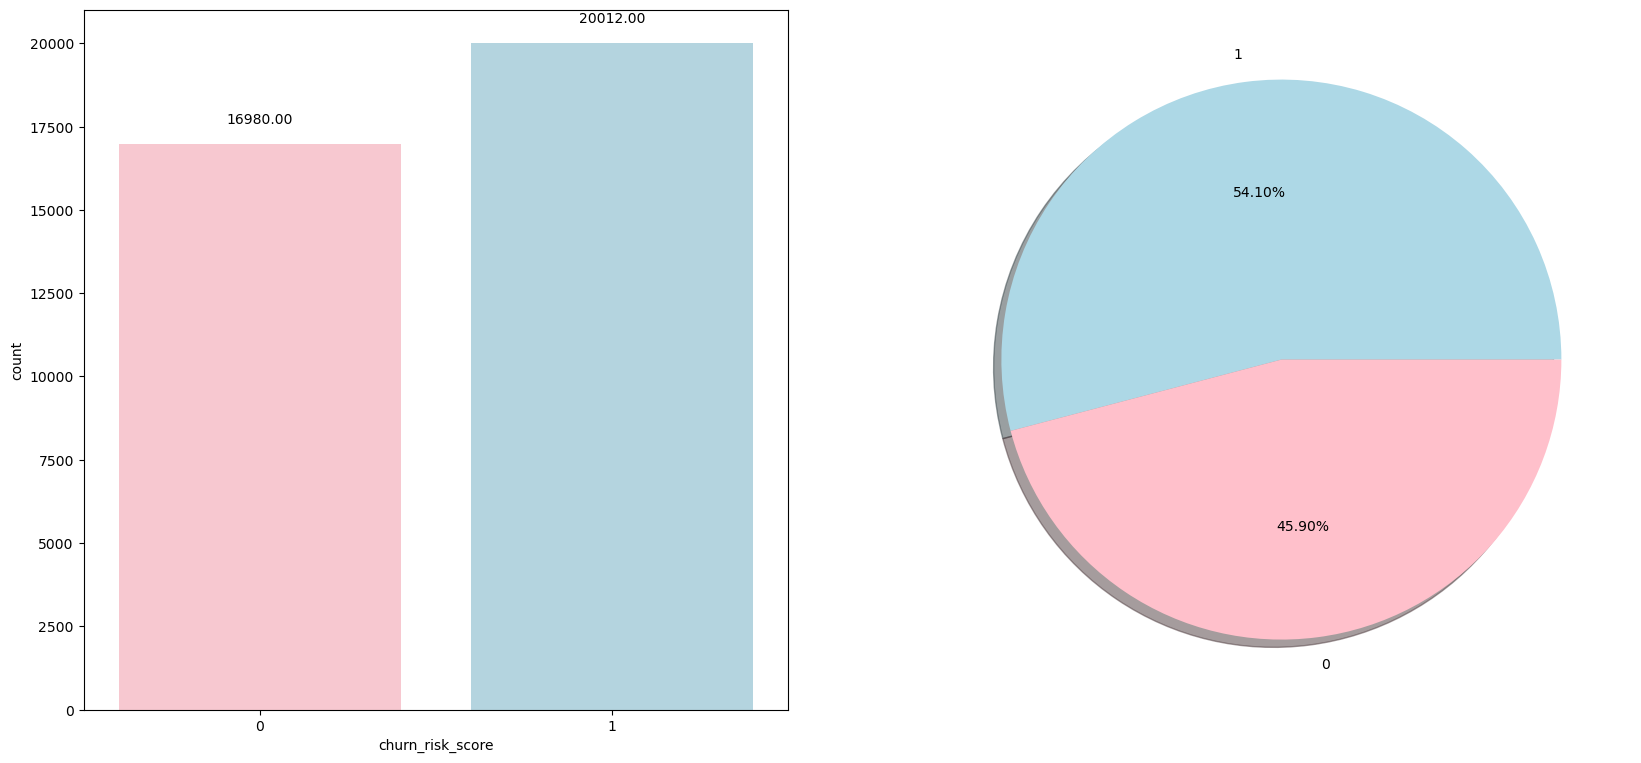

In [25]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
ax = sns.countplot(x='churn_risk_score',data=df,palette=['pink','lightblue'])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2. , p.get_height()), ha = 'center',
           xytext = (0, 15), textcoords = 'offset points')
plt.subplot(2,2,2)
Values  = df["churn_risk_score"].value_counts().values
Lables  = df["churn_risk_score"].value_counts().index
plt.pie(Values,labels=Lables,autopct='%.2f%%',shadow=True,colors=["lightblue",'pink'])
plt.show() 

##### Target feature churn_risk_score's classes Custimer will Exit (1) and Customer wont exit (0) are kind of equally distributed by 5:4 ratio.

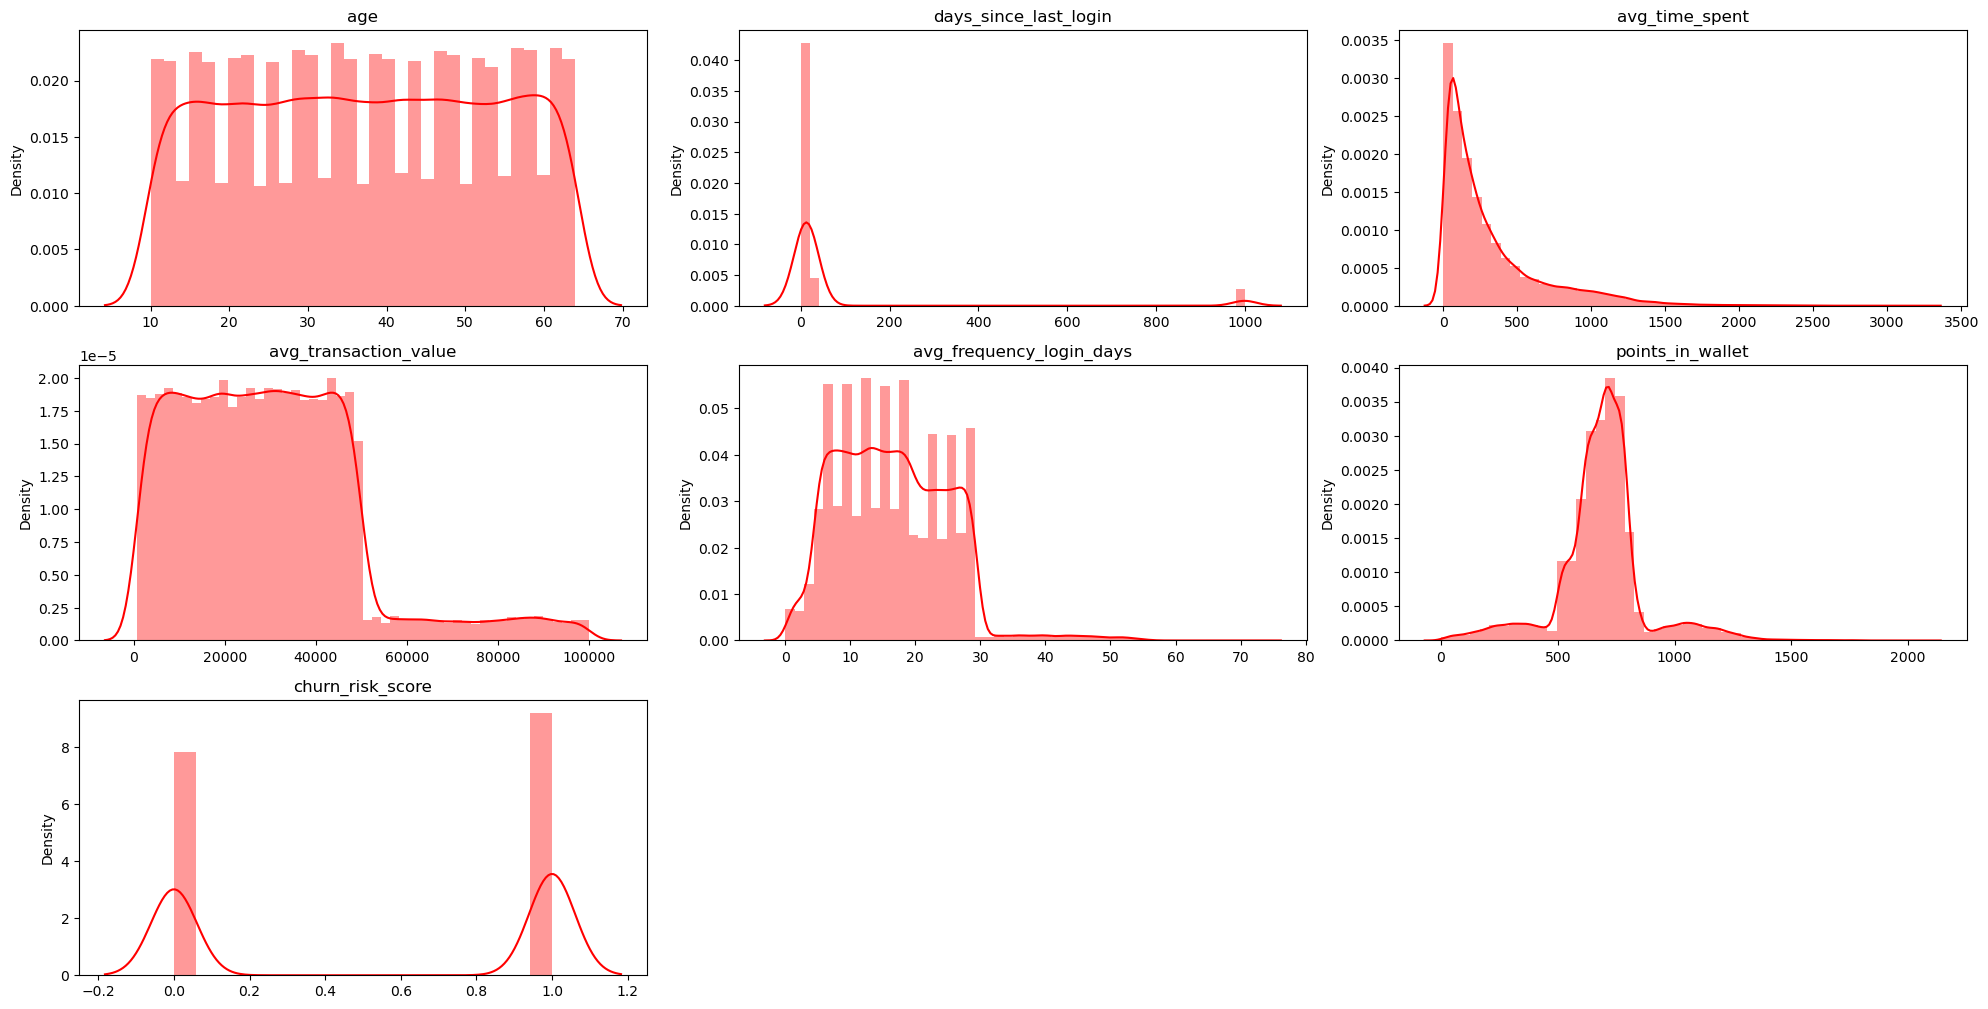

In [26]:
columns_to_plot = df_num.columns
plt.figure(figsize=(20,20))
for i,col_name in enumerate(columns_to_plot,1):
    plt.subplot(6,3,i)
    sns.distplot(x=df_num[col_name],color='red')
    plt.title(col_name)
plt.tight_layout()
plt.show()

In [27]:
df_num.skew()

age                        -0.007319
days_since_last_login       3.941162
avg_time_spent              1.992459
avg_transaction_value       1.011027
avg_frequency_login_days    0.638976
points_in_wallet            0.195460
churn_risk_score           -0.164487
dtype: float64

##### The skewness value of -0.007319 suggests a nearly symmetric distribution for the 'age' feature. 

##### As we can see from plot independent feature days_since_last_login is highly left skewed

##### avg_time_spent ,avg_transaction_value ,avg_frequency_login_days are moderately skewed distribution

##### The skewness value of -0.164487 suggests a nearly symmetric distribution for the 'churn_risk_score' feature.

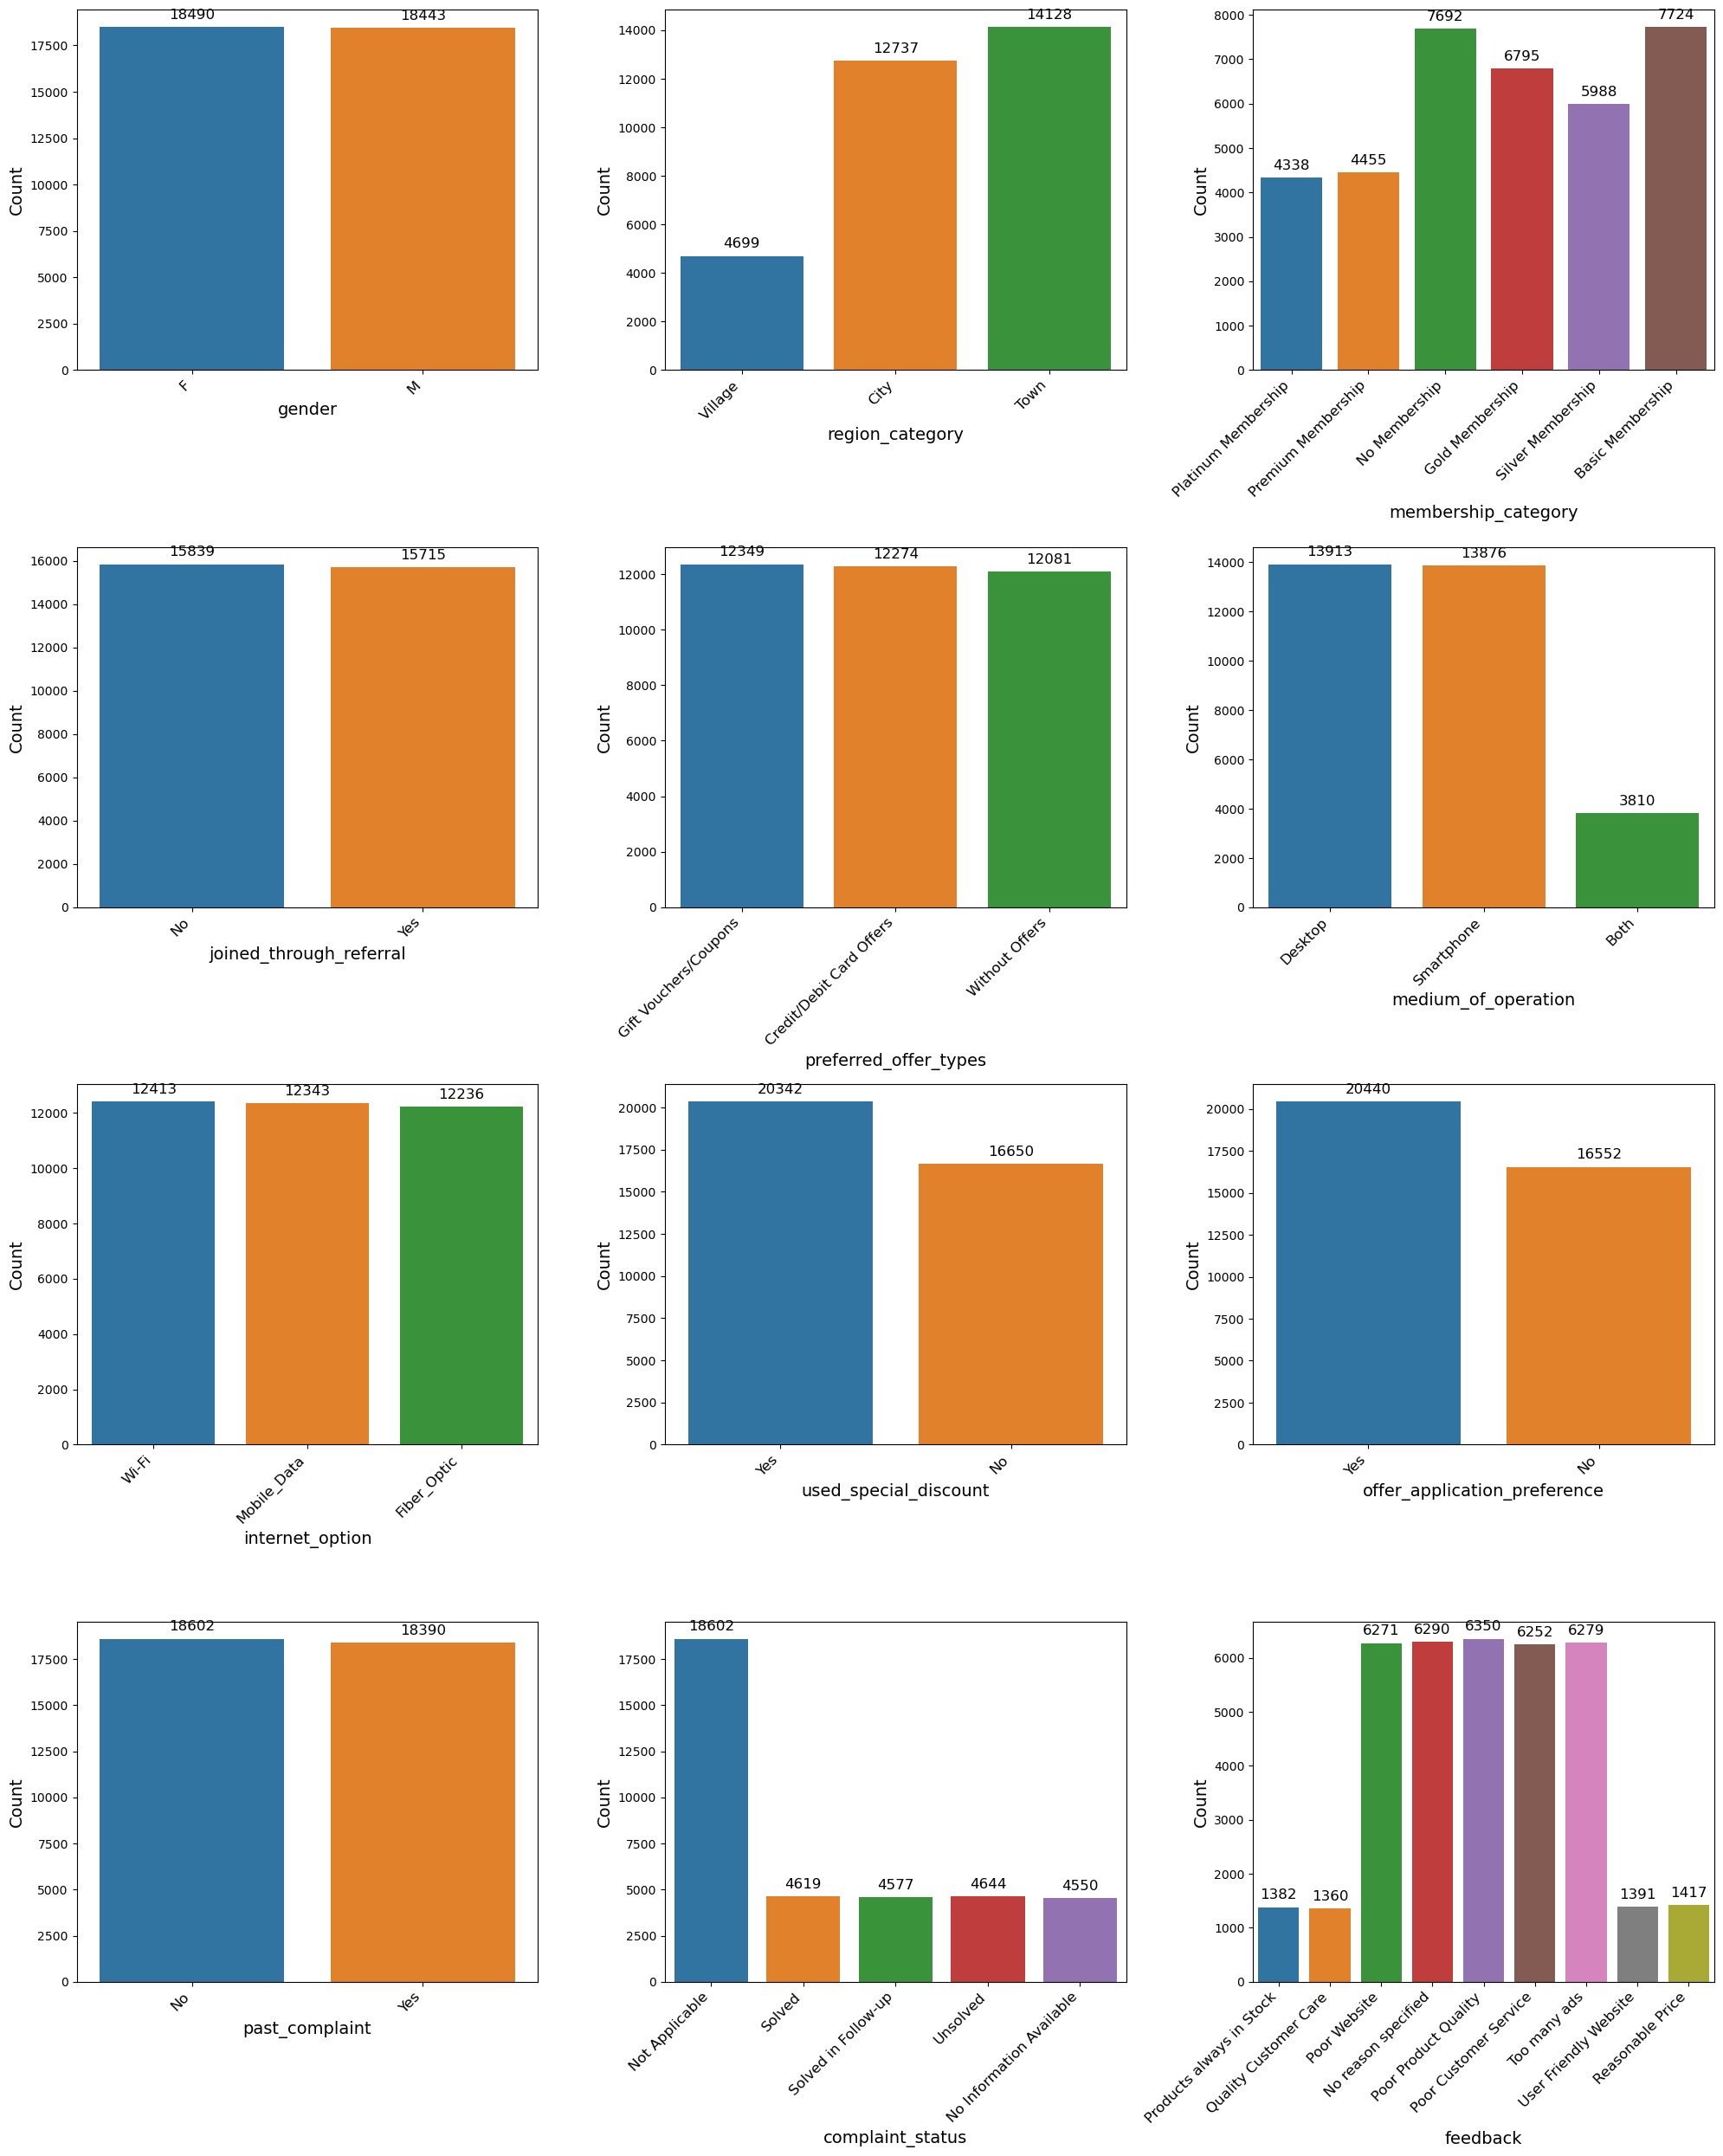

In [28]:
data_cat = df_cat.columns
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20, 25)) 

for variable, subplot in zip(data_cat, ax.flatten()):
    z = sns.countplot(x=df_cat[variable], ax=subplot) 
    z.set_xlabel(variable, fontsize=14)
    z.set_ylabel('Count', fontsize=14)
    z.set_xticklabels(z.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
    
    
    for p in subplot.patches:
        subplot.annotate(format(p.get_height(), '.0f'), 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha = 'center', va = 'center', 
                         xytext = (0, 10), 
                         textcoords = 'offset points',
                         fontsize=12)
plt.tight_layout()
plt.show()

##### As we can see both genders, Male and Female are equally distributed.

##### Most of the customers are from town region while least number of customer belongs to village which is 4699.

#####  Basic category & No are leading one in membership_category while platinum & premium are least subscribed which is around ~4300+

##### Around 15K customers have joined through referral program

##### Most of the customers either use Desktop or Smartphone to access website

##### Most of the customers has given negative feedback about the service such as poor website, poor product quality ,poor customer service etc.

# 4.4 Bivariate and Multivariate Analysis

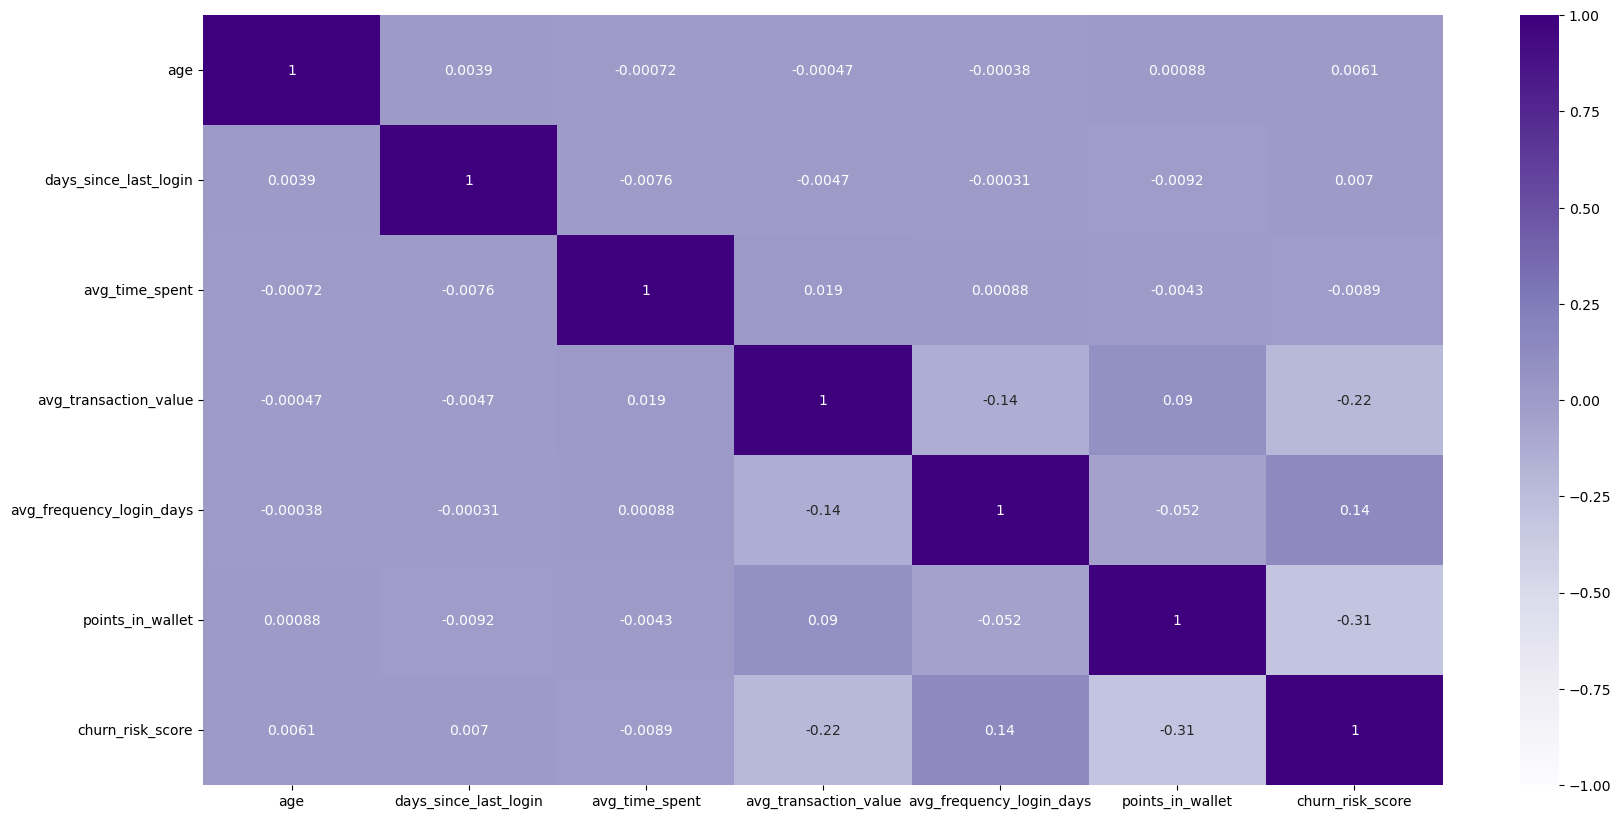

In [29]:
plt.figure(figsize=(20,10))
sns.heatmap(df_num.corr(), vmax=1, vmin=-1,cmap='Purples', annot=True)
plt.show()

##### There isn't high correlation between independent features and customer chrun

##### Maximum -ve correlation between point in wallet and customer chrun is -0.31

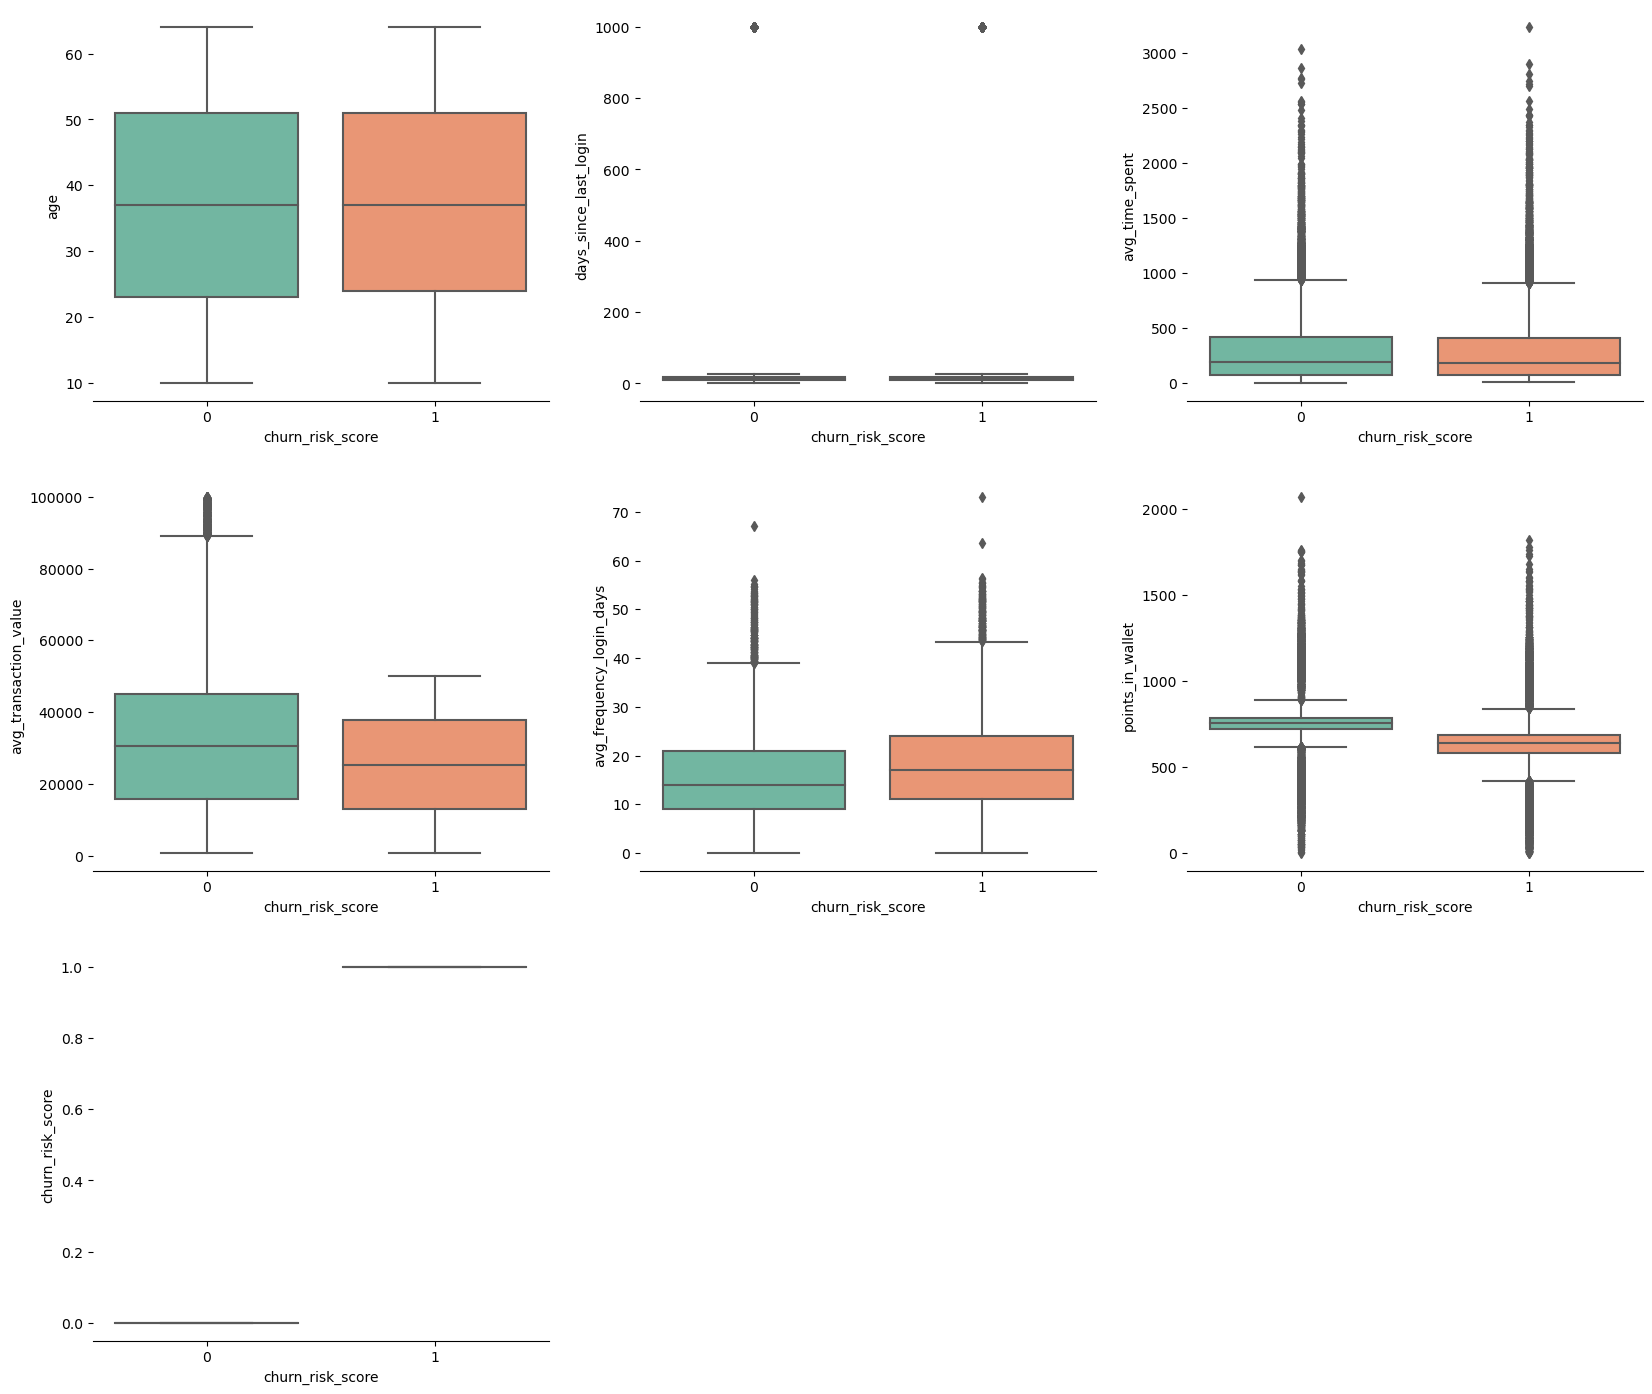

In [30]:
numeric_columns = df_num.columns
plt.figure(figsize=(20, 60))

sns.set_palette(sns.color_palette("Set2", 8))
for i, variable in enumerate(numeric_columns):
        plt.subplot(10,3,i+1)
        
        sns.boxplot(x='churn_risk_score',y= df[variable], data=df)     
        sns.despine(top=True,right=True,left=True) 
        

##### Outliers have been identified in the variables 'avg_time_spent' , 'points_in_wallet' and avg_frequency_login_days

In [31]:
#plt.figure(figsize=(20, 60))
#sns.pairplot(df)
#plt.show()

##### Multivariate statistics compare more than two variables.

##### we can see the all the plots from the above plots.

# 4.5 Missing Value Treatment

In [32]:
import missingno as ms

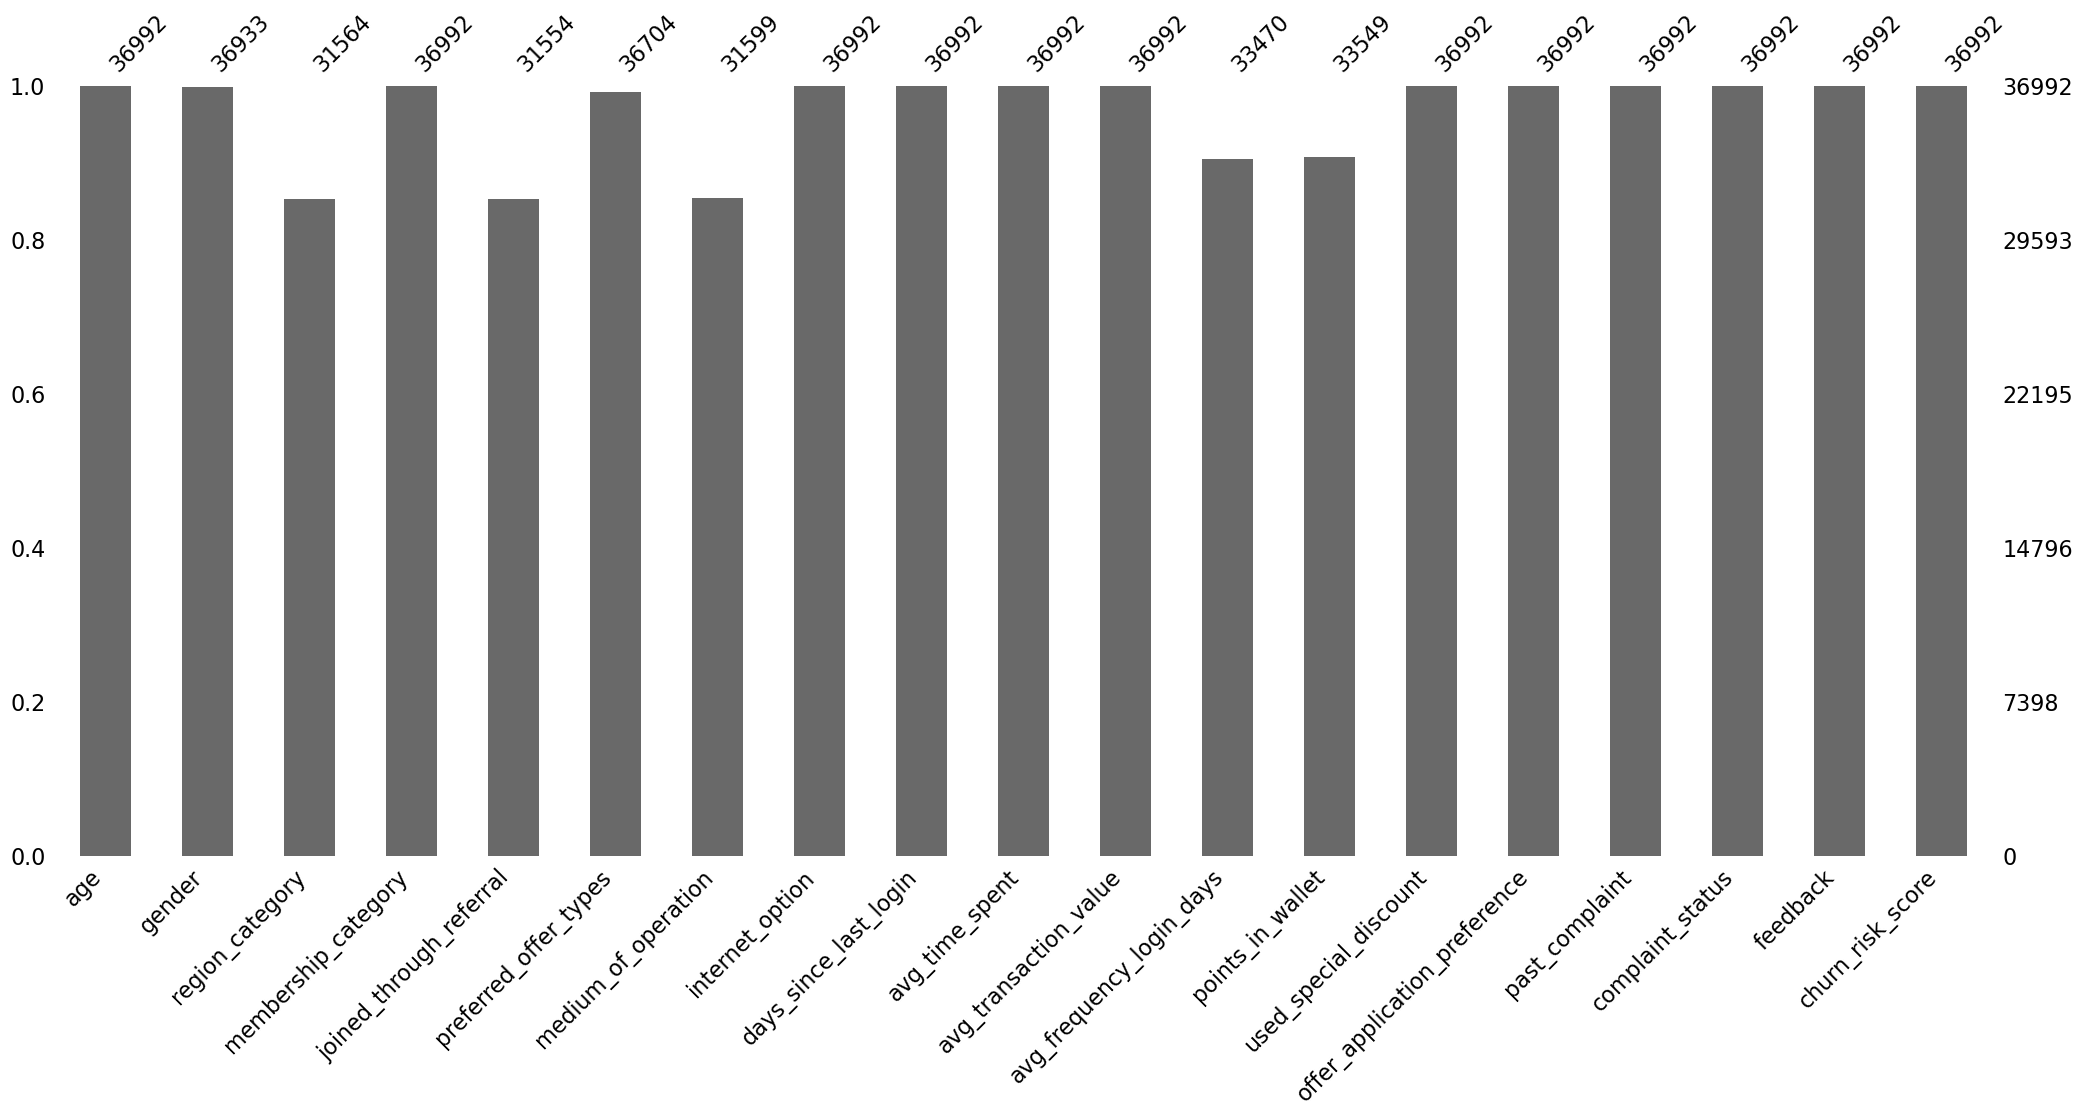

In [33]:
ms.bar(df)
plt.show()

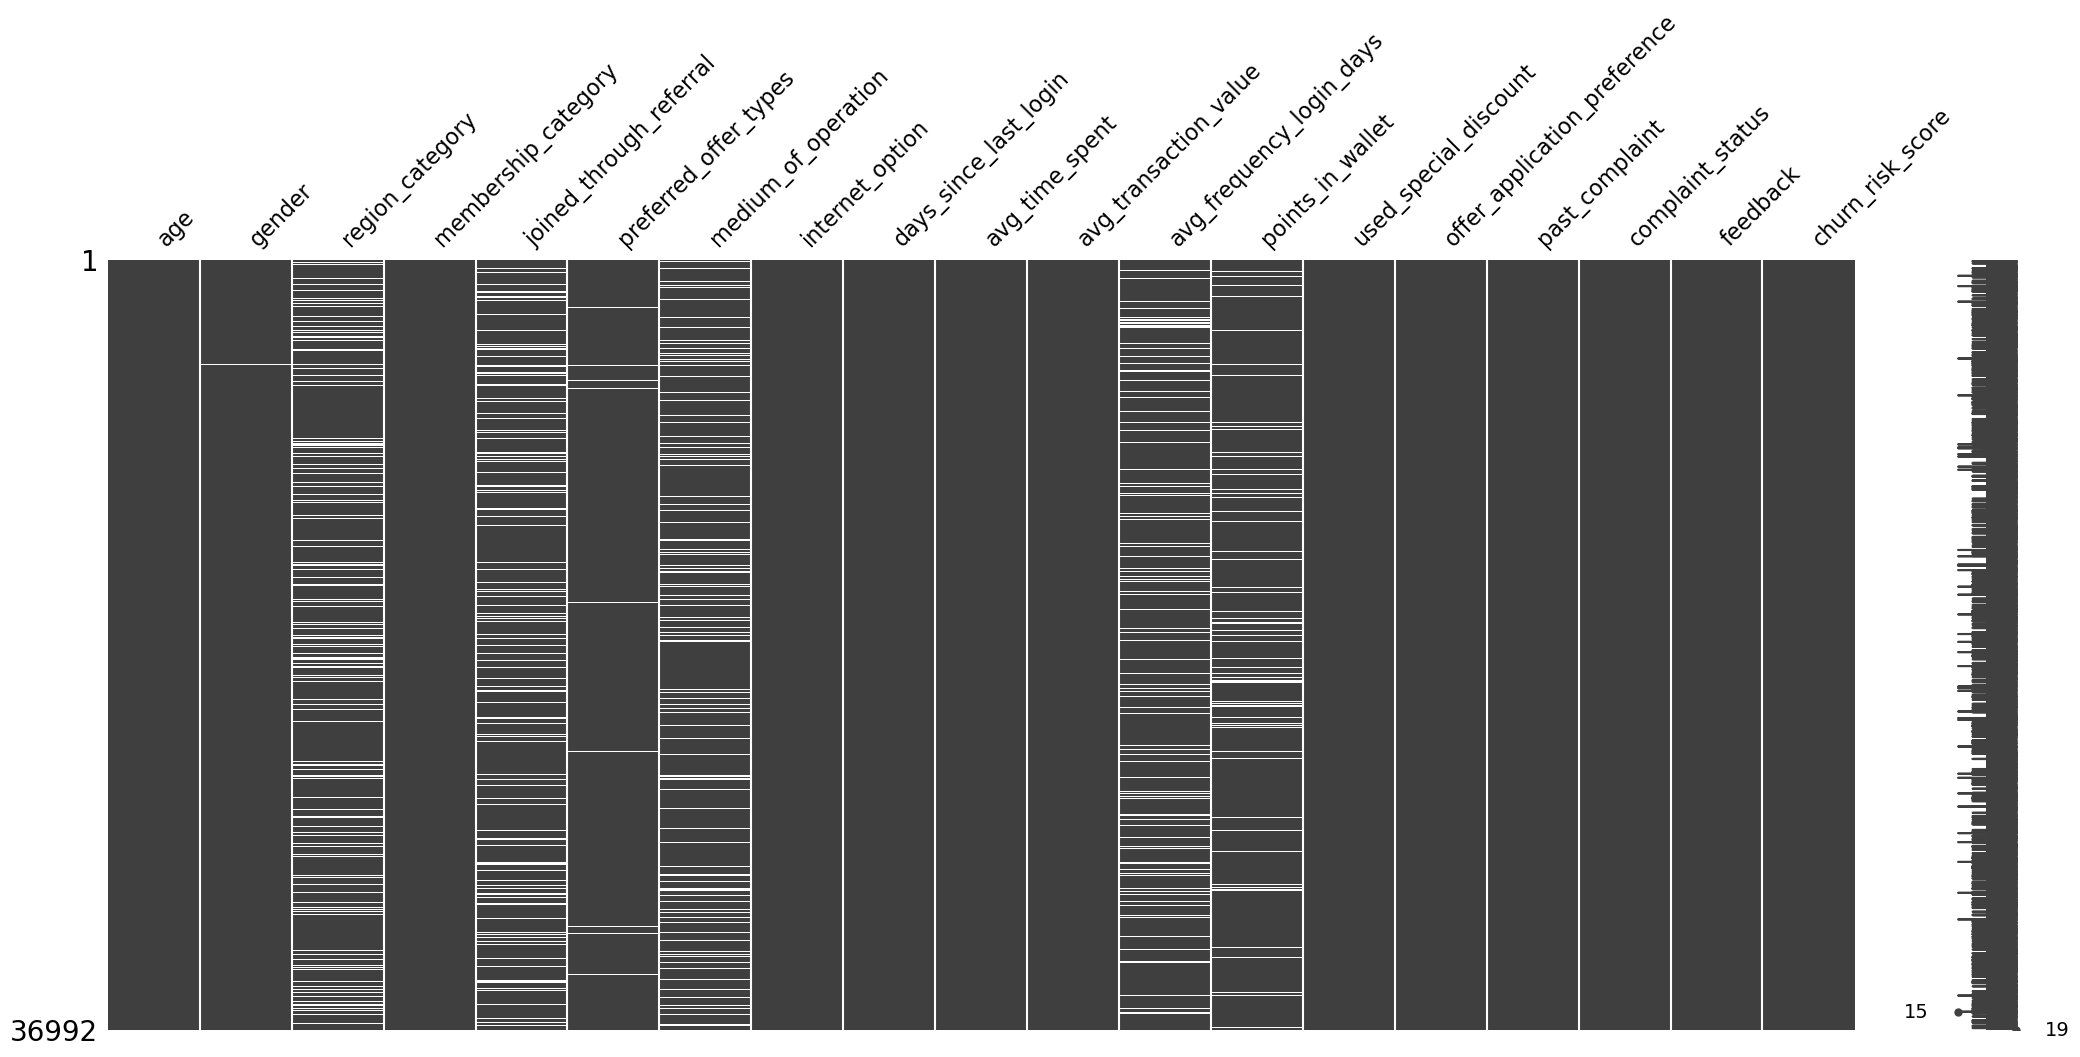

In [34]:
ms.matrix(df)
plt.show()

##### There are 7 features that has missing values, which are joined_through_referral has the most missing values around 15%

In [35]:
def missing_value_percentage(df):
    missvalcount = df.isnull().sum()
    missvalpercent = round(df.isnull().sum() / df.shape[0] * 100)
    dtypes = df.dtypes
    newdf = pd.concat([missvalcount, missvalpercent, dtypes], axis=1)
    newdf.columns = ['missvalcount', 'missval%', 'dtype']
    newdf = newdf[newdf['missvalcount'] != 0].sort_values(by='missvalcount', ascending=False)
    return newdf

In [36]:
missing_value_percentage(df)

,missvalcount,missval%,dtype
joined_through_referral,5438,15.0,object
region_category,5428,15.0,object
medium_of_operation,5393,15.0,object
avg_frequency_login_days,3522,10.0,float64
points_in_wallet,3443,9.0,float64
preferred_offer_types,288,1.0,object
gender,59,0.0,object


### Missing values treatment for numerical variable  

In [37]:
num_names = ['avg_frequency_login_days','points_in_wallet']
for col in num_names:
    df[col] = df[col].fillna(df[col].median())

### Missing values treatment for categorical variable

In [38]:
Missing_cat = ['joined_through_referral','region_category','medium_of_operation','preferred_offer_types','gender']
for i,col in enumerate(Missing_cat):
    df[col].fillna(df[col].mode()[0],inplace=True)

##### 1. For imputing missing values for categorical features we have used mode value

##### 2. For imputing missing values for numerical featurers we have used median value

In [39]:
missing_value_percentage(df)

,missvalcount,missval%,dtype


In [40]:
df_cat2 = df.select_dtypes(include='object')
df_num2 = df.select_dtypes(exclude='object')

# 4.6 Outliers  Analysis

### 4.6.1 Discovery of Outliers

In [41]:
Q1 = df_num2.quantile(0.25) 
Q3 = df_num2.quantile(0.75) 
IQR = Q3 - Q1 

outlier = ((df_num2 < (Q1 - 1.5 * IQR)) | (df_num2 > (Q3 + 1.5 * IQR)))
for i in outlier.columns:
    num_outliers = len(outlier[outlier[i] == True][i])
    if num_outliers > 0:
        print(f'Total number of outliers in column {i} are {num_outliers}')

Total number of outliers in column days_since_last_login are 1999
Total number of outliers in column avg_time_spent are 2814
Total number of outliers in column avg_transaction_value are 1131
Total number of outliers in column avg_frequency_login_days are 419
Total number of outliers in column points_in_wallet are 4779


### 4.6.2 Visualizing outliers using Boxplots & distplot

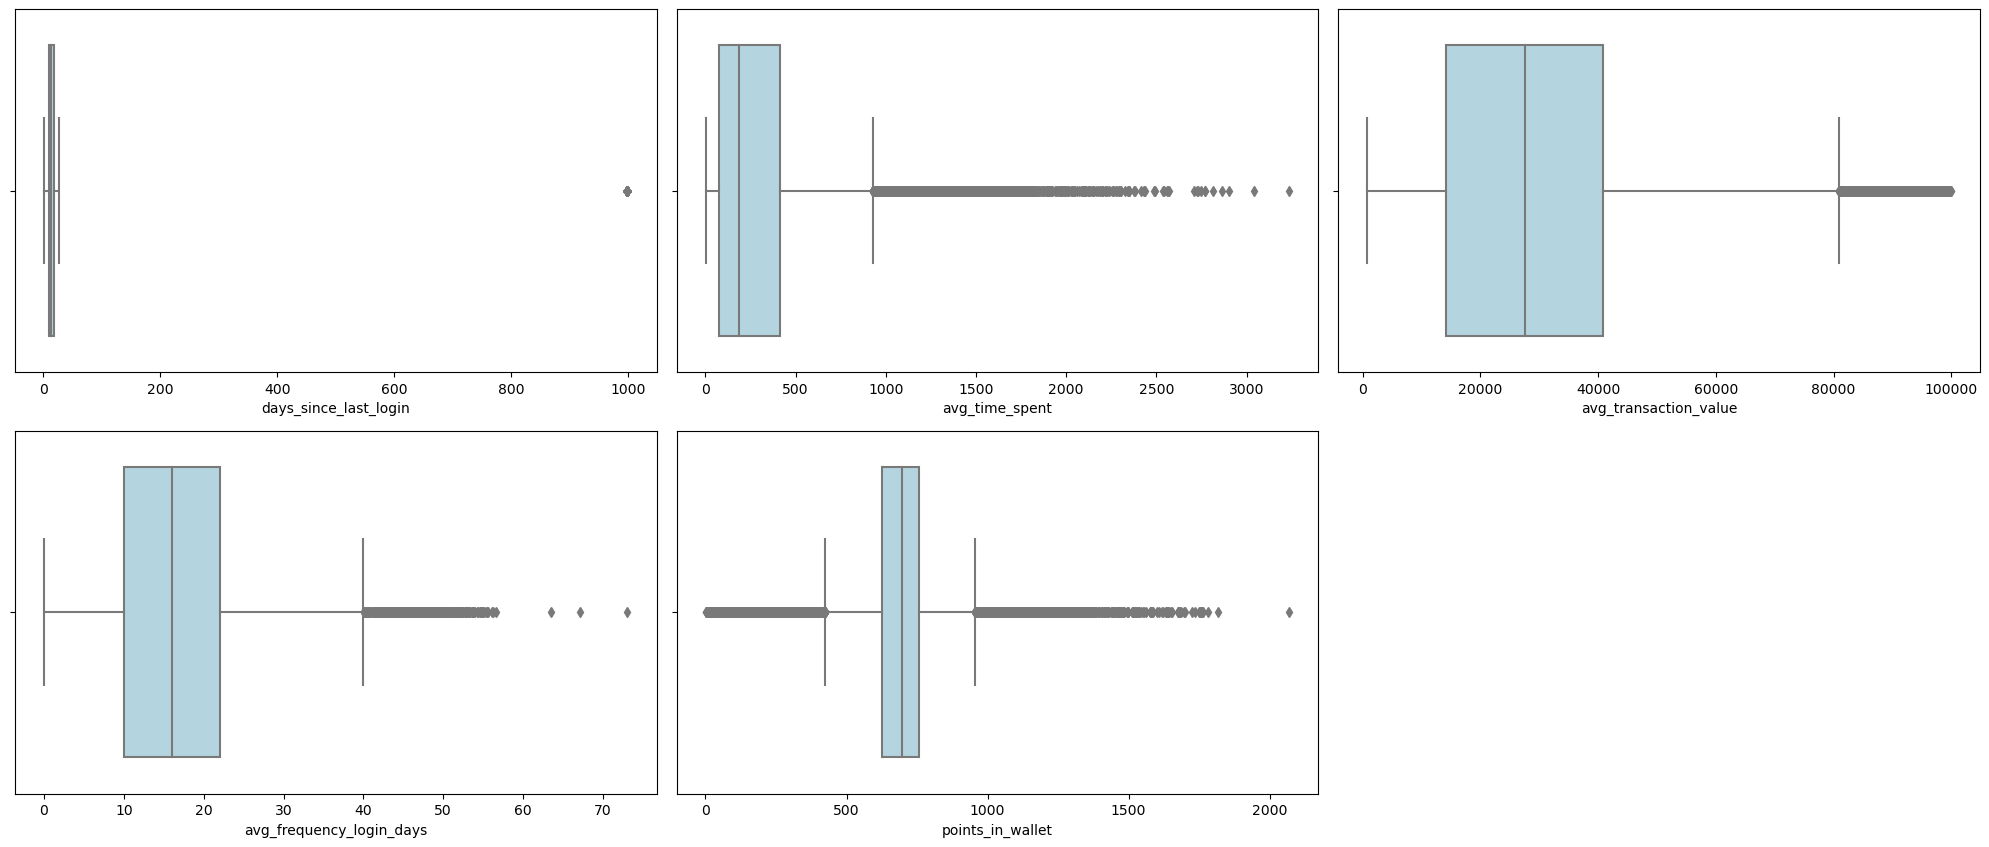

In [42]:
columns_to_plot = ['days_since_last_login','avg_time_spent','avg_transaction_value','avg_frequency_login_days','points_in_wallet']
plt.figure(figsize=(20, 25))
for i,col_name in enumerate(columns_to_plot,1):
    plt.subplot(6,3,i)
    sns.boxplot(x=df[col_name],color='lightblue')
    plt.tight_layout()
plt.show()

##### avg_time_spent,points in wallet , avg_time_spent and avg frequency login days are having outliers in large numbers, which will be treated .

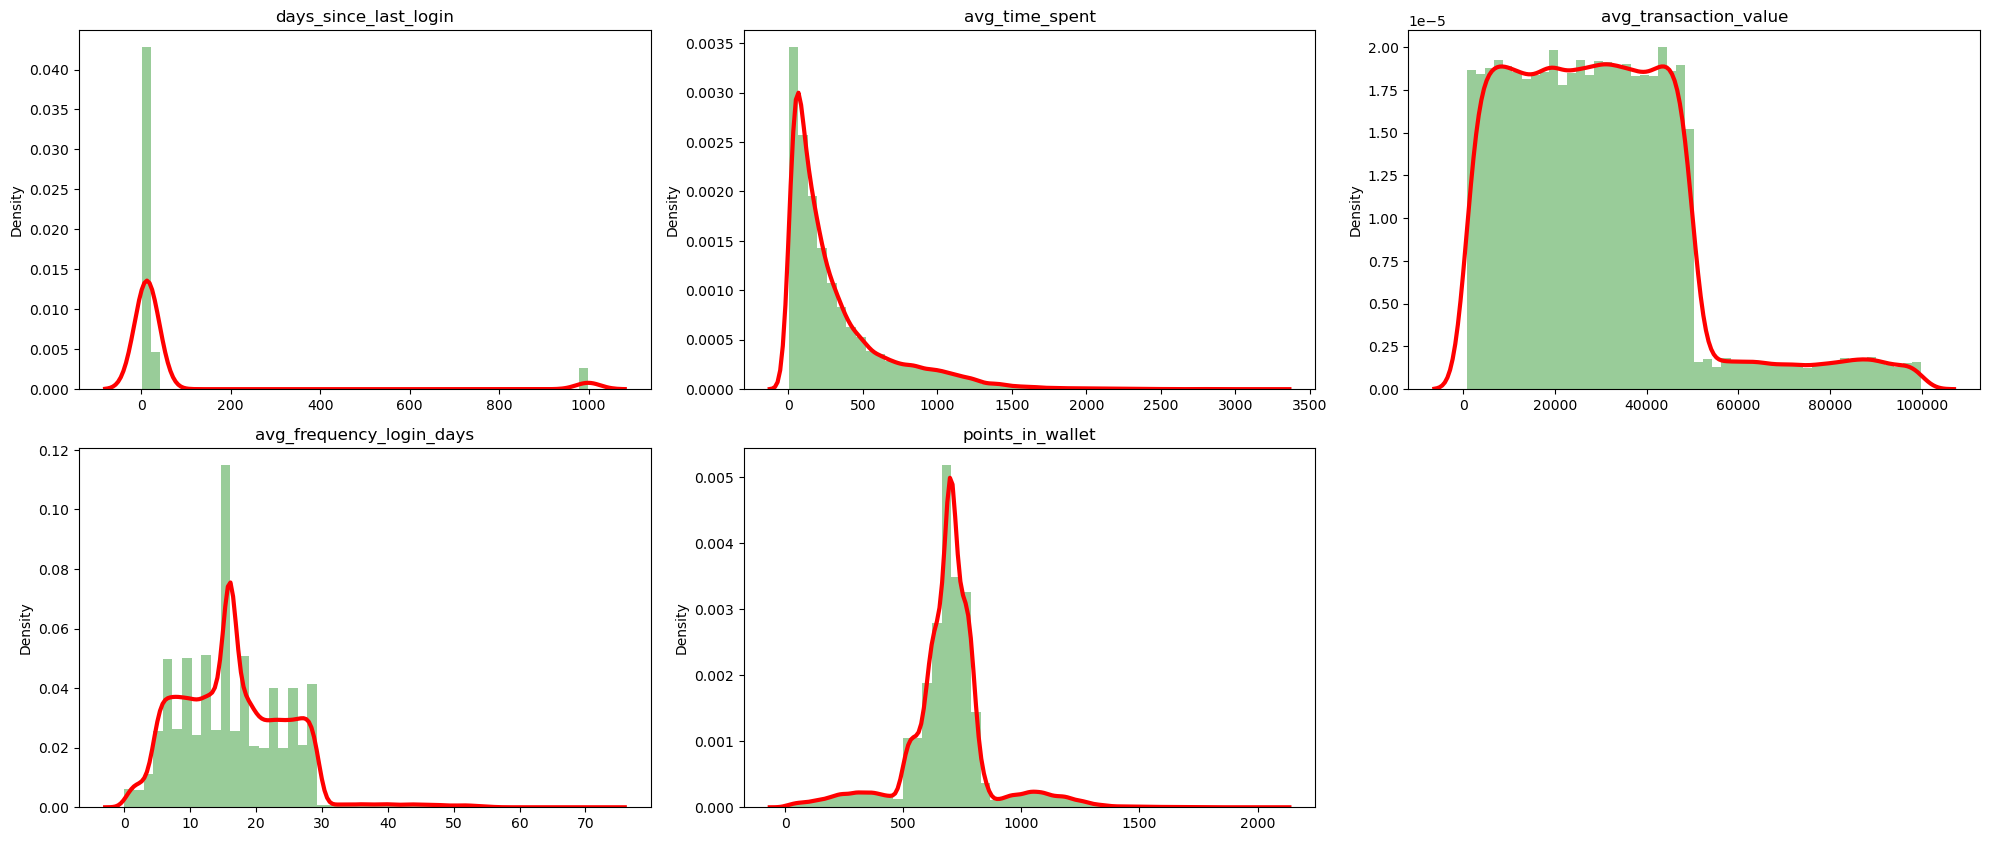

In [43]:
columns_to_plot = ['days_since_last_login', 'avg_time_spent','avg_transaction_value','avg_frequency_login_days','points_in_wallet']
plt.figure(figsize=(20,25))
for i,col_name in enumerate(columns_to_plot,1):
    plt.subplot(6,3,i)
    sns.distplot(x=df[col_name],color='green',kde_kws={'color': 'red', 'lw': 3})
    plt.title(col_name)
plt.tight_layout()
plt.show()

In [44]:
df[['days_since_last_login','avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']].skew()

days_since_last_login       3.941162
avg_time_spent              1.992459
avg_transaction_value       1.011027
avg_frequency_login_days    0.686719
points_in_wallet            0.190623
dtype: float64

### 4.6.3 Removal of Outliers

In [45]:
def outlier(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    IQR = q3 - q1
    lower_limit = q1 - 1.5 * IQR
    upper_limit = q3 + 1.5 * IQR
    filtered_value = df[(df[column_name] > lower_limit) & (df[column_name] < upper_limit)]
    return filtered_value 

In [46]:
df2 = outlier(df, "days_since_last_login")  
df3 = outlier(df2, "avg_time_spent")  
df4 = outlier(df3, "avg_transaction_value")  
df5 = outlier(df4, "avg_frequency_login_days")  
df6 = outlier(df5, "points_in_wallet")

### 4.6.4 After removing outlier ,Visualizing using Boxplots & distplot

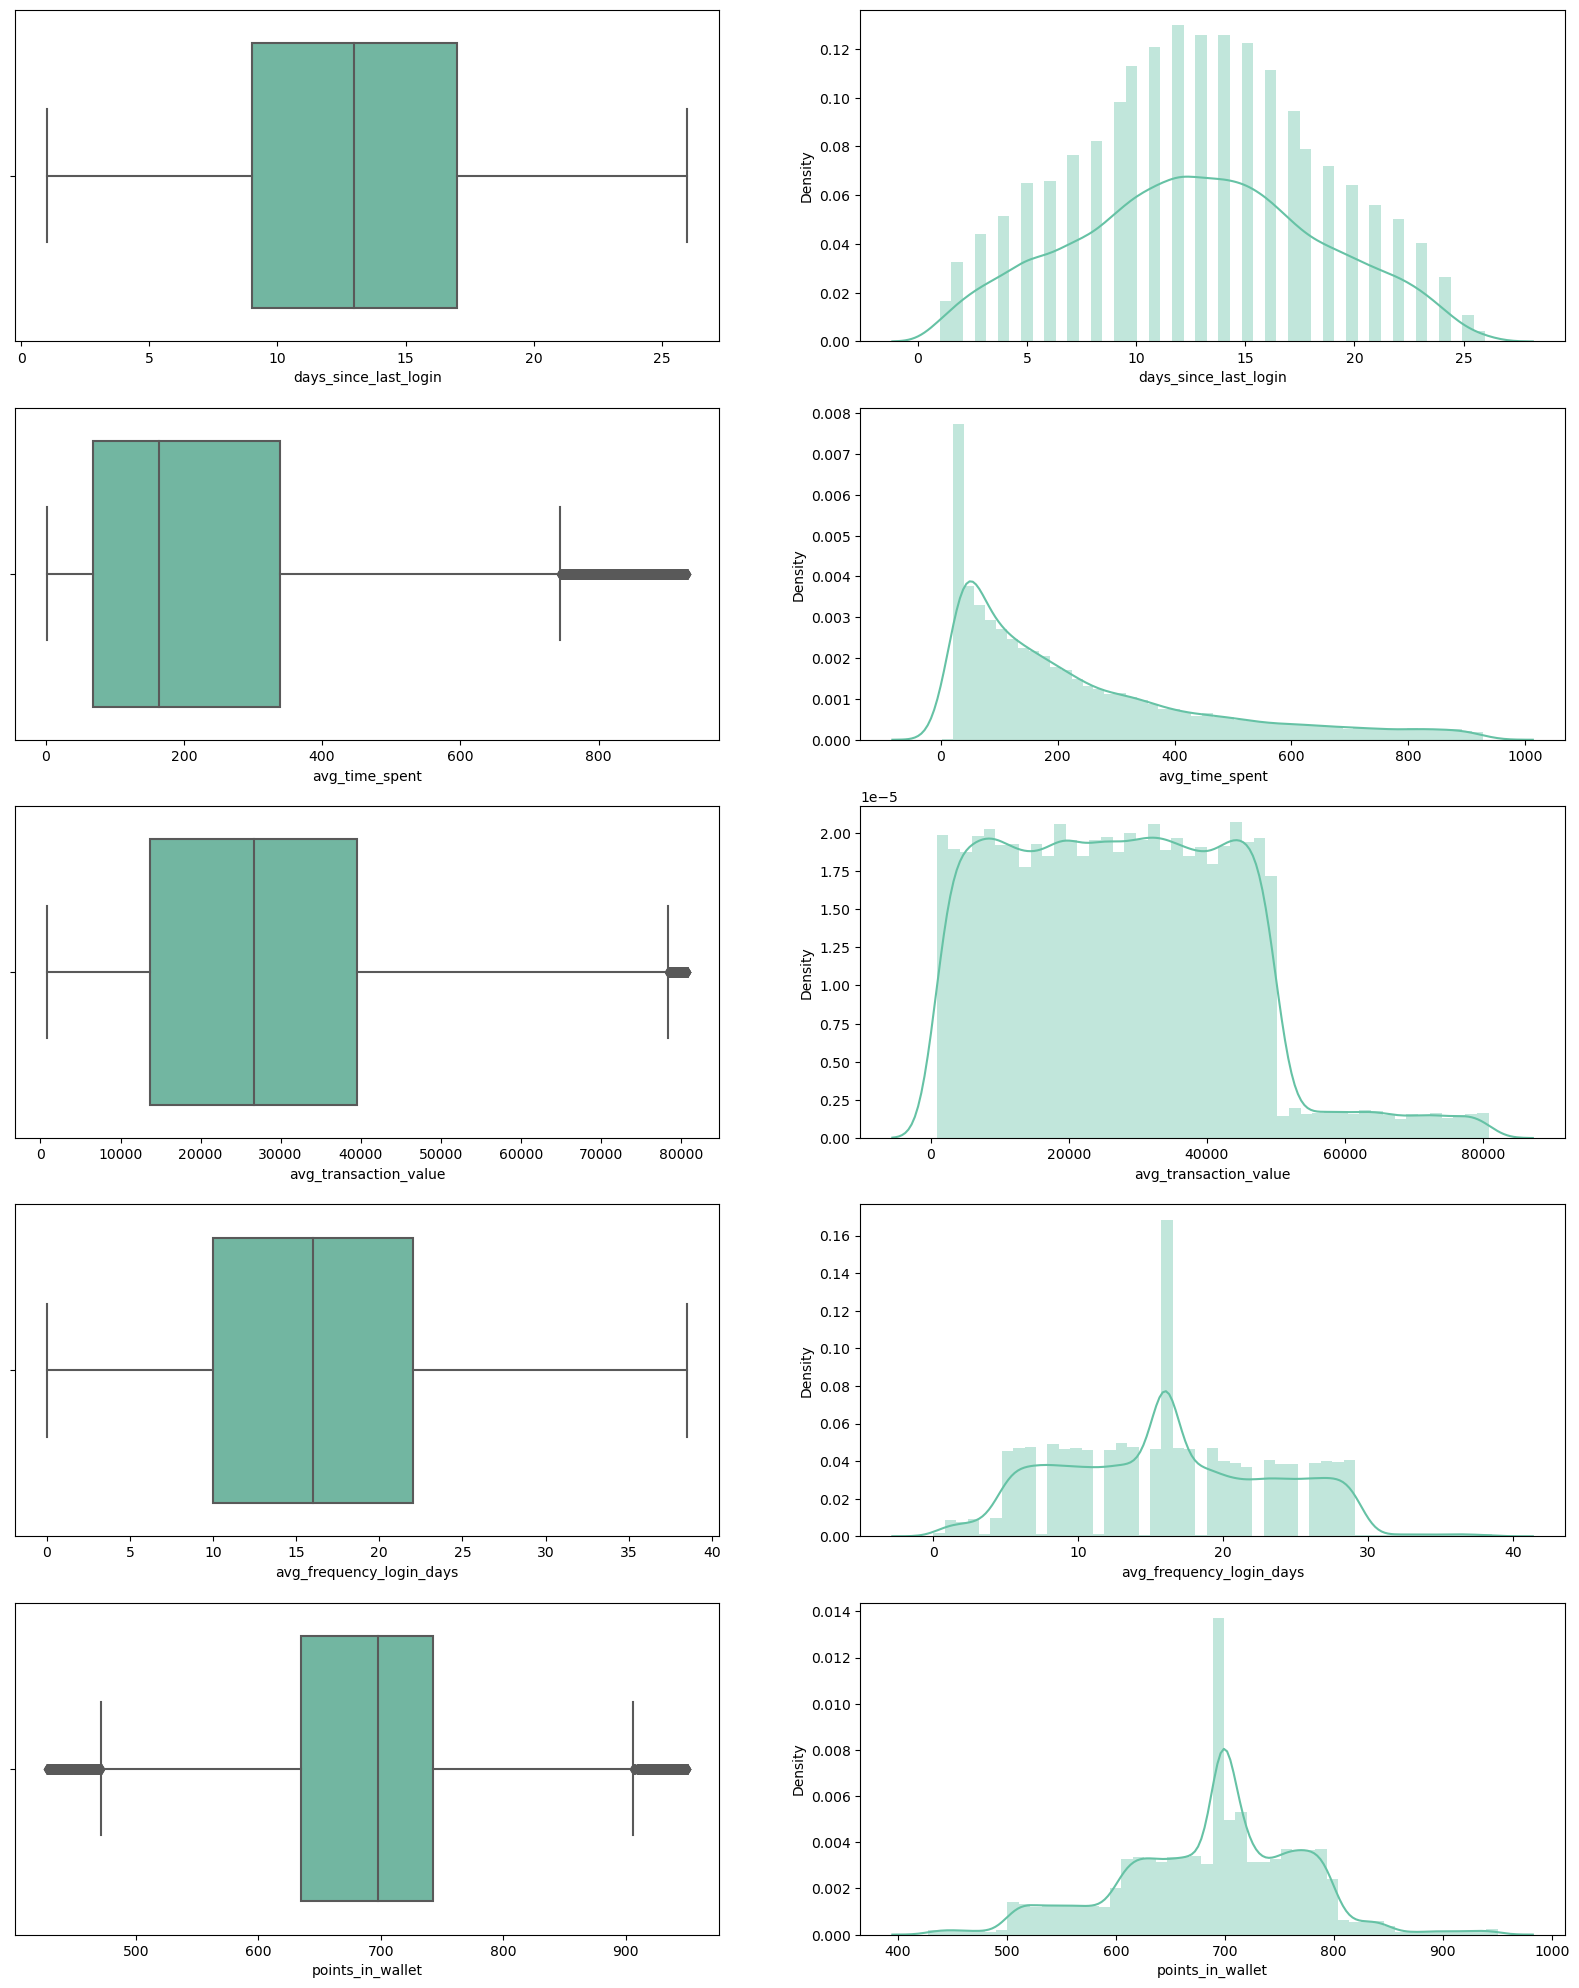

In [47]:
plt.figure(figsize=(20, 25))
plt.subplot(5,2,1)
sns.boxplot(x=df6["days_since_last_login"])
plt.subplot(5,2,2)
sns.distplot(df6["days_since_last_login"])
plt.subplot(5,2,3)
sns.boxplot(x=df6["avg_time_spent"])
plt.subplot(5,2,4)
sns.distplot(df6["avg_time_spent"])
plt.subplot(5,2,5)
sns.boxplot(x=df6["avg_transaction_value"])
plt.subplot(5,2,6)
sns.distplot(df6["avg_transaction_value"])
plt.subplot(5,2,7)
sns.boxplot(x=df6["avg_frequency_login_days"])
plt.subplot(5,2,8)
sns.distplot(df6["avg_frequency_login_days"])
plt.subplot(5,2,9)
sns.boxplot(x=df6["points_in_wallet"])
plt.subplot(5,2,10)
sns.distplot(df6["points_in_wallet"])
plt.show()

# 4.7 Data Scaling and Transformation

In [48]:
df = df6.copy()

In [49]:
categorical_columns = ['gender', 'region_category', 'membership_category','joined_through_referral', 'preferred_offer_types',
                       'medium_of_operation', 'internet_option', 'used_special_discount','offer_application_preference', 
                       'past_complaint', 'complaint_status','feedback']
for column in categorical_columns:
    df[column] = LabelEncoder.fit_transform(df[column])

In [50]:
num_columns = ['days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']  


columns_to_scale = ['days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']
for column in columns_to_scale:
    df[column] = standard_scale.fit_transform(df[[column]])

In [51]:
df

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,0,2,3,0,1,1,2,0.744433,0.284475,1.561456,0.117657,1.151454,1,1,0,1,4,0
1,32,0,0,4,0,1,1,1,0.564917,0.310736,-0.885065,-0.847226,0.136691,1,0,1,2,5,0
2,44,0,1,2,1,1,1,2,0.205883,1.275727,-0.386305,0.806859,-2.239050,0,1,1,3,3,1
3,37,1,0,2,1,1,1,1,-0.332668,-0.853168,-0.129722,-1.398588,-1.431173,0,1,1,4,3,1
4,31,0,0,2,0,0,2,1,1.282984,-0.577863,-0.175763,-0.020183,-0.280336,0,1,1,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36986,27,1,1,3,1,0,1,1,0.026366,-0.473463,-1.166020,-0.020183,0.751194,1,0,0,1,0,0
36987,46,0,1,0,0,0,1,2,-1.948320,1.894415,-0.005583,-1.398588,-0.564426,0,1,1,0,0,1
36988,29,0,1,0,0,2,2,2,0.026366,1.836653,-0.992793,1.633902,-1.909723,1,0,0,1,1,1
36989,23,0,1,0,1,1,1,2,-0.153151,-0.385573,0.655272,-0.020183,-0.070315,0,1,1,4,3,1


# 4.8 Data Scaling and Transformation

In [108]:
Features = df.drop('churn_risk_score',axis = 1)
Target = df['churn_risk_score']

Features = sm.add_constant(Features)

Xtrain, xtest, Ytrain, ytest = train_test_split(Features,Target,test_size=0.20, random_state=42)

print(f'Xtrain {Xtrain.shape}')
print(f'Ytrain {Ytrain.shape}')

print(f'xtest {xtest.shape}')
print(f'ytest {ytest.shape}')

Xtrain (21526, 19)
Ytrain (21526,)
xtest (5382, 19)
ytest (5382,)


# Logistic Regression

In [109]:
Xtrain.drop(['age','gender','region_category','preferred_offer_types','medium_of_operation','days_since_last_login','avg_time_spent','past_complaint','complaint_status'],axis=1,inplace=True)
logreg = sm.Logit(Ytrain,Xtrain).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.423439
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       churn_risk_score   No. Observations:                21526
Model:                          Logit   Df Residuals:                    21516
Method:                           MLE   Df Model:                            9
Date:                Fri, 20 Oct 2023   Pseudo R-squ.:                  0.3835
Time:                        23:29:50   Log-Likelihood:                -9115.0
converged:                       True   LL-Null:                       -14785.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            2.0737      0.085     24.270      0.000       1.906       2.241
membership_category             -0.4824      0.011    -43.377      0.000      -0.504      -0.461
joined_through_referral          0.1153      0.038      3.070      0.002       0.042       0.189
internet_option                 -0.0346      0.023     -1.531      0.126      -0.079       0.010
avg_transaction_value           -0.1926      0.019     -9.947      0.000      -0.231      -0.155
avg_frequency_login_days         0.1440      0.019      7.680      0.000       0.107       0.181
points_in_wallet                -1.6169      0.028    -57.404      0.000      -1.672      -1.562
used_special_discount           -0.2539      0.068     -3.741      0.000      -0.387      -0.121
offer_application_preference    -0.2277      0.068     -3.353      0.001      -0.361      -0.095
feedback                        -0.1002      0.007    -13.503      0.000      -0.115      -0.086
================================================================================================
"""

In [111]:
logreg.aic 

18249.901198858497

In [112]:
df_odds = pd.DataFrame(np.exp(logreg.params), columns= ['Odds']) 
df_odds

,Odds
const,7.954054
membership_category,0.617322
joined_through_referral,1.122234
internet_option,0.966012
avg_transaction_value,0.824814
avg_frequency_login_days,1.154839
points_in_wallet,0.198516
used_special_discount,0.775777
offer_application_preference,0.796401
feedback,0.904656


In [114]:
xtest.drop(['age','gender','region_category','preferred_offer_types','medium_of_operation','days_since_last_login','avg_time_spent','past_complaint','complaint_status'],axis=1,inplace=True)
y_pred_prob = logreg.predict(xtest)
y_pred_prob.head()

13845    0.917771
8974     0.244661
34512    0.664349
2629     0.166065
28199    0.420543
dtype: float64

In [115]:
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

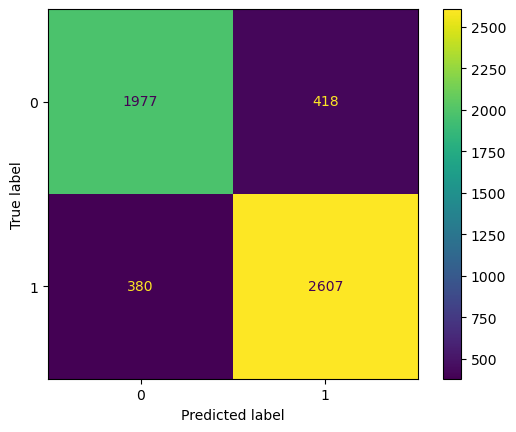

In [116]:
cm = confusion_matrix(ytest, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [118]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      2395
           1       0.86      0.87      0.87      2987

    accuracy                           0.85      5382
   macro avg       0.85      0.85      0.85      5382
weighted avg       0.85      0.85      0.85      5382



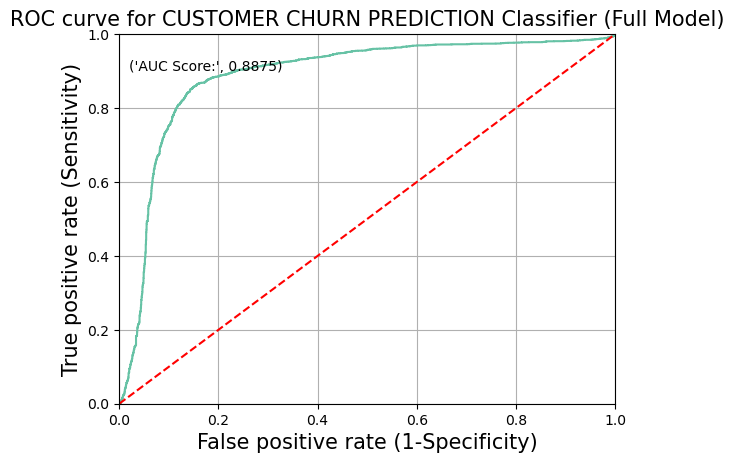

In [119]:
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for CUSTOMER CHURN PREDICTION Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(ytest, y_pred_prob),4)))
plt.grid(True)

In [120]:
youdens_table = pd.DataFrame({'TPR': tpr,'FPR': fpr,'Threshold': thresholds})
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.864412,0.156576,0.523630,0.707836
1,0.859725,0.151983,0.535381,0.707742
2,0.856712,0.149061,0.543988,0.707652
3,0.857382,0.149896,0.541157,0.707486
4,0.855708,0.148225,0.545789,0.707483


In [121]:
y_pred_youden = [ 0 if x < 0.523630 else 1 for x in y_pred_prob]

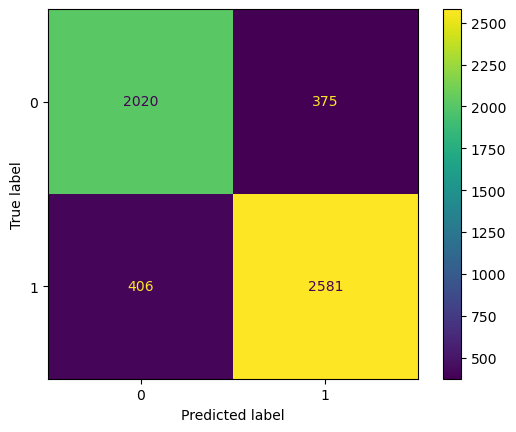

In [122]:
cm = confusion_matrix(ytest,y_pred_youden)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [123]:
print(classification_report(ytest, y_pred_youden))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      2395
           1       0.87      0.86      0.87      2987

    accuracy                           0.85      5382
   macro avg       0.85      0.85      0.85      5382
weighted avg       0.86      0.85      0.85      5382



# Decision Tree

In [65]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [66]:
d_tree = DecisionTreeClassifier(criterion= 'gini',
                                 max_depth= 4,
                                 max_features = 'sqrt',
                                 min_samples_split = 2,
                                 min_samples_leaf = 6,
                                 max_leaf_nodes = 9,
                                 random_state=10)
dt_model = d_tree.fit(Xtrain,Ytrain)

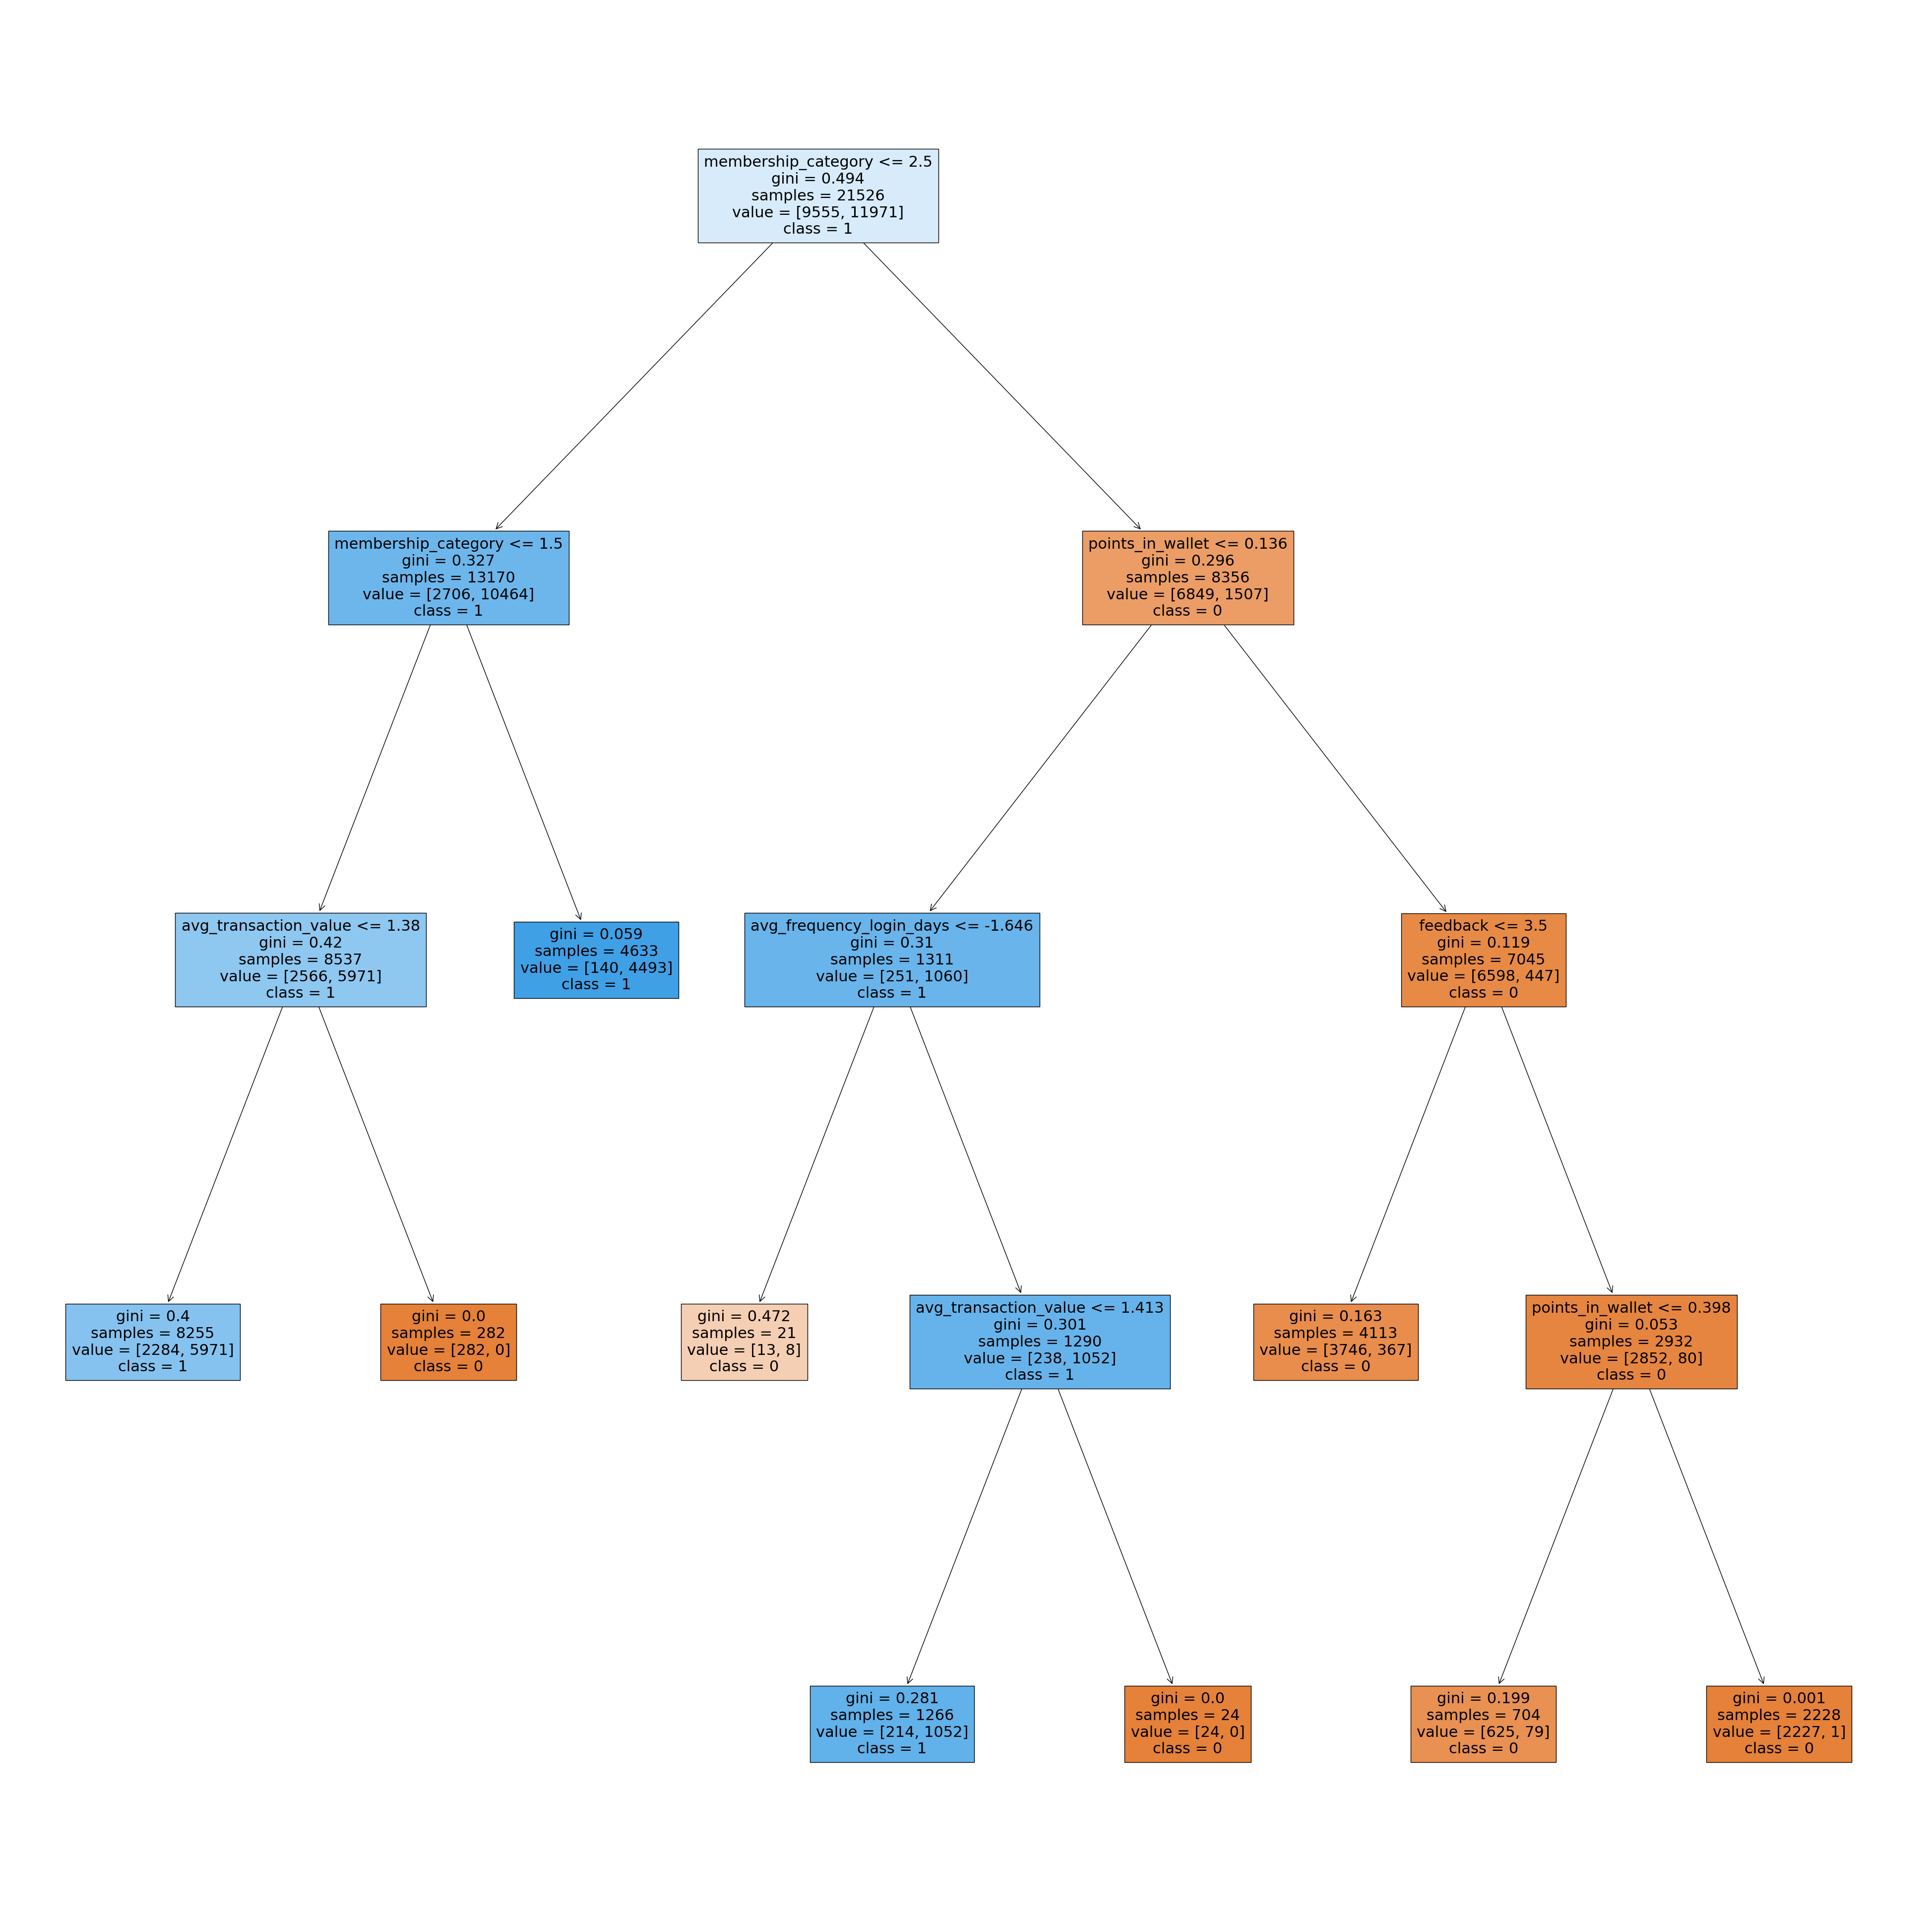

In [67]:
plt.figure(figsize=(50,50))
tree.plot_tree(dt_model,feature_names=list(Xtrain.columns.values),class_names=['0','1'],filled=True)
plt.show()

In [68]:
y_pred_prob = dt_model.predict(xtest)

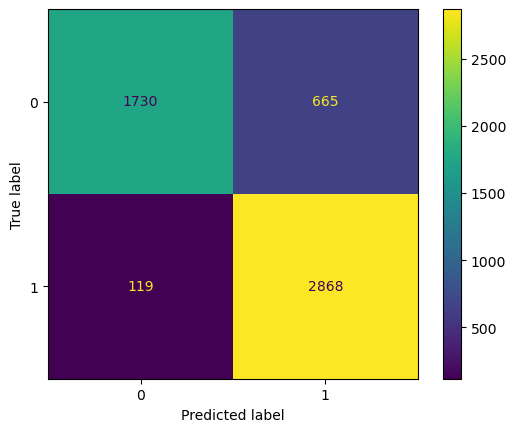

In [69]:
cm = confusion_matrix(ytest,y_pred_prob)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

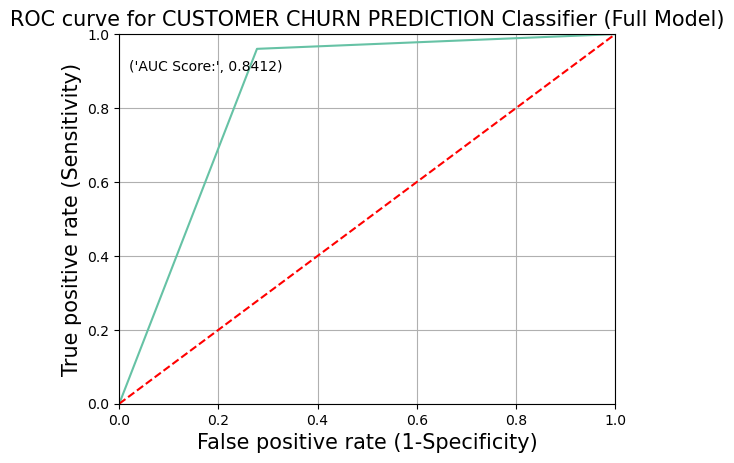

In [70]:
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for CUSTOMER CHURN PREDICTION Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(ytest, y_pred_prob),4)))
plt.grid(True)

In [71]:
print(classification_report(ytest, y_pred_prob))

              precision    recall  f1-score   support

           0       0.94      0.72      0.82      2395
           1       0.81      0.96      0.88      2987

    accuracy                           0.85      5382
   macro avg       0.87      0.84      0.85      5382
weighted avg       0.87      0.85      0.85      5382



# Random Forest

In [72]:
rf_model = RandomForestClassifier(max_depth=4, random_state=10 , max_leaf_nodes=9, criterion= 'gini' , max_features='sqrt' , min_samples_split= 2 , n_estimators= 300)
RF_model = rf_model.fit(Xtrain,Ytrain)

In [73]:
y_pred_prob = RF_model.predict(xtest)

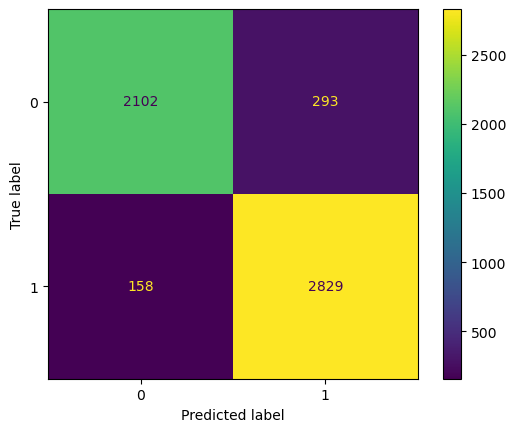

In [74]:
cm = confusion_matrix(ytest,y_pred_prob)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

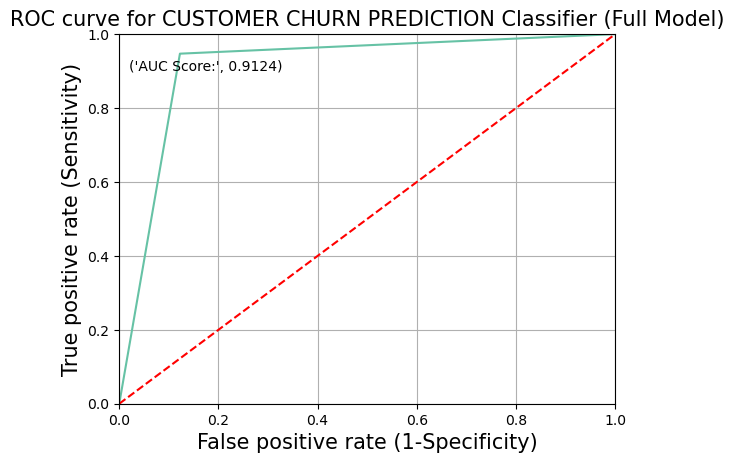

In [75]:
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for CUSTOMER CHURN PREDICTION Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(ytest, y_pred_prob),4)))
plt.grid(True)

In [76]:
print(classification_report(ytest, y_pred_prob))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      2395
           1       0.91      0.95      0.93      2987

    accuracy                           0.92      5382
   macro avg       0.92      0.91      0.91      5382
weighted avg       0.92      0.92      0.92      5382



# Model comparison

### Decision Tree:

    Precision for class 0: 0.94
    Recall for class 0: 0.72
    F1-score for class 0: 0.82
    Precision for class 1: 0.81
    Recall for class 1: 0.96
    F1-score for class 1: 0.88
    Accuracy: 0.85


#### Logistic Regression:

    Precision for class 0: 0.84
    Recall for class 0: 0.83
    F1-score for class 0: 0.83
    Precision for class 1: 0.86
    Recall for class 1: 0.87
    F1-score for class 1: 0.87
    Accuracy: 0.85

### Random Forest:

    Precision for class 0: 0.93
    Recall for class 0: 0.88
    F1-score for class 0: 0.90
    Precision for class 1: 0.91
    Recall for class 1: 0.95
    F1-score for class 1: 0.93
    Accuracy: 0.92

Based on the provided metrics, it's evident that the Random Forest model outperforms both the Decision Tree and Logistic Regression models. It has the highest precision, recall, and F1-scores for both classes, and it also has the highest overall accuracy (0.92).

Therefore, the Random Forest model is the best-performing model among the three evaluated, and it is recommended for the task of churn prediction in this context. It provides a better balance between precision and recall, which is often crucial in applications where both false positives and false negatives have significant consequences.

# CONCLUSION

In conclusion, the Churn Prediction project plays a pivotal role in the success of the website by addressing the critical issue of customer attrition. By leveraging data-driven approaches and machine learning, the project aims to achieve several key objectives:

Identifying Churn Risk: The primary focus is on accurately classifying customers into two categories: those likely to exit and those likely to stay. This binary classification enables the company to pinpoint individuals at risk of leaving the website.

Proactive Customer Retention: Once customers at risk of churning are identified, the project empowers the company to take proactive measures to retain them. These efforts may include personalized incentives, discounts, or exclusive deals, designed to encourage customers to continue using the website's services.

Enhancing Offerings: Churn prediction serves as a valuable source of insights into the factors influencing customer attrition. By analyzing the data, the company gains a deeper understanding of why customers are leaving and can use this knowledge to improve their services, address specific pain points, and enhance the overall user experience.

Business Growth and Sustainability: Ultimately, the overarching goal of this project is to reduce customer churn and increase customer retention, contributing to the website's long-term business sustainability. By identifying customers likely to leave and taking targeted actions, the company can mitigate the loss of customers and maintain a strong and loyal customer base.

In today's competitive landscape, where customer loyalty and engagement are paramount, the Churn Prediction project is an essential tool for businesses to not only retain their existing customer base but also to continuously evolve and improve their offerings. It underscores the importance of data-driven decision-making and customer-centric strategies for long-term success.





